In [1]:
#pip install --upgrade vnstock

In [2]:
import vnstock as vn
from datetime import datetime 
from dateutil.relativedelta import relativedelta

import numpy as np
import pandas as pd
import pandas_ta as ta
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
sns.set_style('whitegrid')
plt.style.use("seaborn-v0_8-dark-palette")

In [3]:
last_stock_list = ['VND', 'VIX', 'SHS', 'TVS']

In [4]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

start = start.strftime('%Y-%m-%d')
end = end.strftime('%Y-%m-%d')

for stock in last_stock_list:
    # Tạo DataFrame cho cổ phiếu và đặt cột "time" làm index
    stock_data = vn.stock_historical_data(stock, start, end, resolution='1D', type='stock')
    stock_data = stock_data.set_index("time")
    
    # Lưu DataFrame vào biến globals()
    globals()[stock] = stock_data


company_list = [VND, VIX, SHS, TVS]
company_name = ["Chứng khoán VnDirect", "Chứng khoán Vietstock", 
                "Chứng khoán SG - HN", "Chứng khoán Thiên Việt" ]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    





In [5]:
df = pd.concat(company_list, axis=0)
#df.time = pd.to_datetime(df.time)
#df = df.set_index("time")
df.tail(10)


open   high    low  close  volume ticker            company_name
time                                                                         
2023-12-29  20900  21850  20900  21100   70300    TVS  Chứng khoán Thiên Việt
2024-01-02  21100  21200  21050  21100   31200    TVS  Chứng khoán Thiên Việt
2024-01-03  21100  21200  20950  21200   25600    TVS  Chứng khoán Thiên Việt
2024-01-04  21450  21850  21400  21500   89300    TVS  Chứng khoán Thiên Việt
2024-01-05  21500  21650  21500  21650   63000    TVS  Chứng khoán Thiên Việt
2024-01-08  21700  21750  21500  21550   28400    TVS  Chứng khoán Thiên Việt
2024-01-09  21500  21600  21250  21300   49100    TVS  Chứng khoán Thiên Việt
2024-01-10  21300  21350  21150  21300   12100    TVS  Chứng khoán Thiên Việt
2024-01-11  21250  21800  21050  21350   25600    TVS  Chứng khoán Thiên Việt
2024-01-12  21050  21350  20900  21350   41900    TVS  Chứng khoán Thiên Việt

In [6]:
pd.set_option('display.float_format', '{:.2f}'.format)
VND.describe()

open     high      low    close       volume
count   251.00   251.00   251.00   251.00       251.00
mean  18654.38 18996.21 18299.20 18620.91  26324358.17
std    3061.52  3111.86  3009.32  3057.38  12846232.75
min   13400.00 13800.00 13100.00 13400.00   6799000.00
25%   15550.00 15800.00 15250.00 15475.00  17904950.00
50%   19000.00 19450.00 18650.00 19050.00  24575400.00
75%   21275.00 21575.00 20800.00 21150.00  31235650.00
max   25200.00 25600.00 24700.00 25250.00 105878000.00

In [7]:
VIX.describe()

open     high      low    close      volume
count   251.00   251.00   251.00   251.00      251.00
mean  12233.70 12487.24 11948.08 12229.68 23159495.20
std    4649.31  4731.52  4506.81  4632.23 13917999.85
min    5740.00  5860.00  5680.00  5710.00  2264300.00
25%    6955.00  7060.00  6800.00  6960.00 13322550.00
50%   12600.00 12900.00 11900.00 12650.00 20208100.00
75%   16600.00 16900.00 16149.00 16525.00 31447650.00
max   20600.00 20750.00 19750.00 20600.00 73885104.00

In [8]:
SHS.describe()

open     high      low    close      volume
count   251.00   251.00   251.00   251.00      251.00
mean  13878.49 14269.32 13603.98 13954.98 21338168.51
std    3803.02  3902.59  3721.87  3820.24 10295186.79
min    7500.00  8300.00  7500.00  8000.00  3768100.00
25%   10100.00 10350.00 10000.00 10100.00 14598250.00
50%   14300.00 14600.00 14100.00 14400.00 19325500.00
75%   17400.00 18000.00 17050.00 17550.00 25560250.00
max   20600.00 20700.00 19800.00 20500.00 69713696.00

In [9]:
TVS.describe()

open     high      low    close    volume
count   251.00   251.00   251.00   251.00    251.00
mean  20394.31 20682.25 19985.31 20297.14  70444.22
std    3155.40  3198.93  3091.25  3134.18  80503.34
min   15300.00 15580.00 15080.00 15080.00    200.00
25%   16960.00 17260.00 16590.00 16790.00  13650.00
50%   20600.00 20950.00 20300.00 20600.00  42700.00
75%   23125.00 23500.00 22775.00 23050.00  94300.00
max   28000.00 28400.00 27000.00 27600.00 488900.00

In [10]:
VIX.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 2023-01-12 to 2024-01-12
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   open          251 non-null    int32 
 1   high          251 non-null    int32 
 2   low           251 non-null    int32 
 3   close         251 non-null    int32 
 4   volume        251 non-null    int64 
 5   ticker        251 non-null    object
 6   company_name  251 non-null    object
dtypes: int32(4), int64(1), object(2)
memory usage: 11.8+ KB


## Closing Price

<Figure size 5120x3840 with 0 Axes>

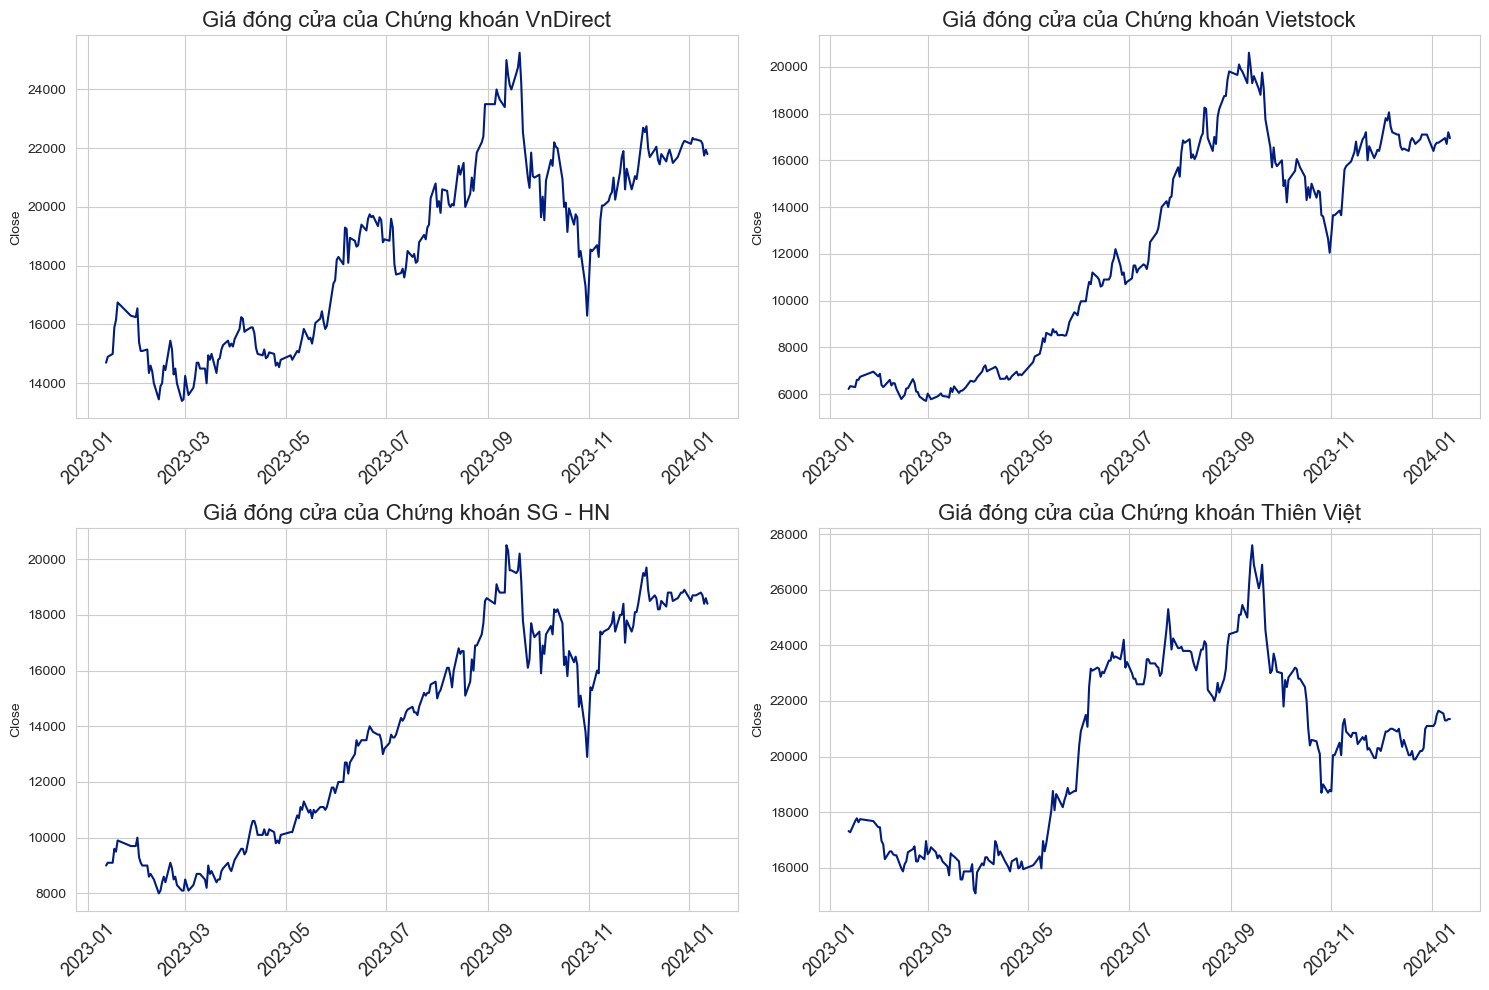

<Figure size 5120x3840 with 0 Axes>

In [11]:
plt.figure(figsize=(15, 10))
sns.set_style('whitegrid')
plt.style.use("seaborn-v0_8-dark-palette")
%matplotlib inline
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    ax = plt.plot(company['close'] )
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.xticks(rotation = 45, fontsize=13)
    plt.title(f"Giá đóng cửa của {company_name[i - 1]}",
             fontsize=16)
    
plt.tight_layout()
#output_file_path = 'Closing_price.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=800)

## Volume of Sales

<Figure size 5120x3840 with 0 Axes>

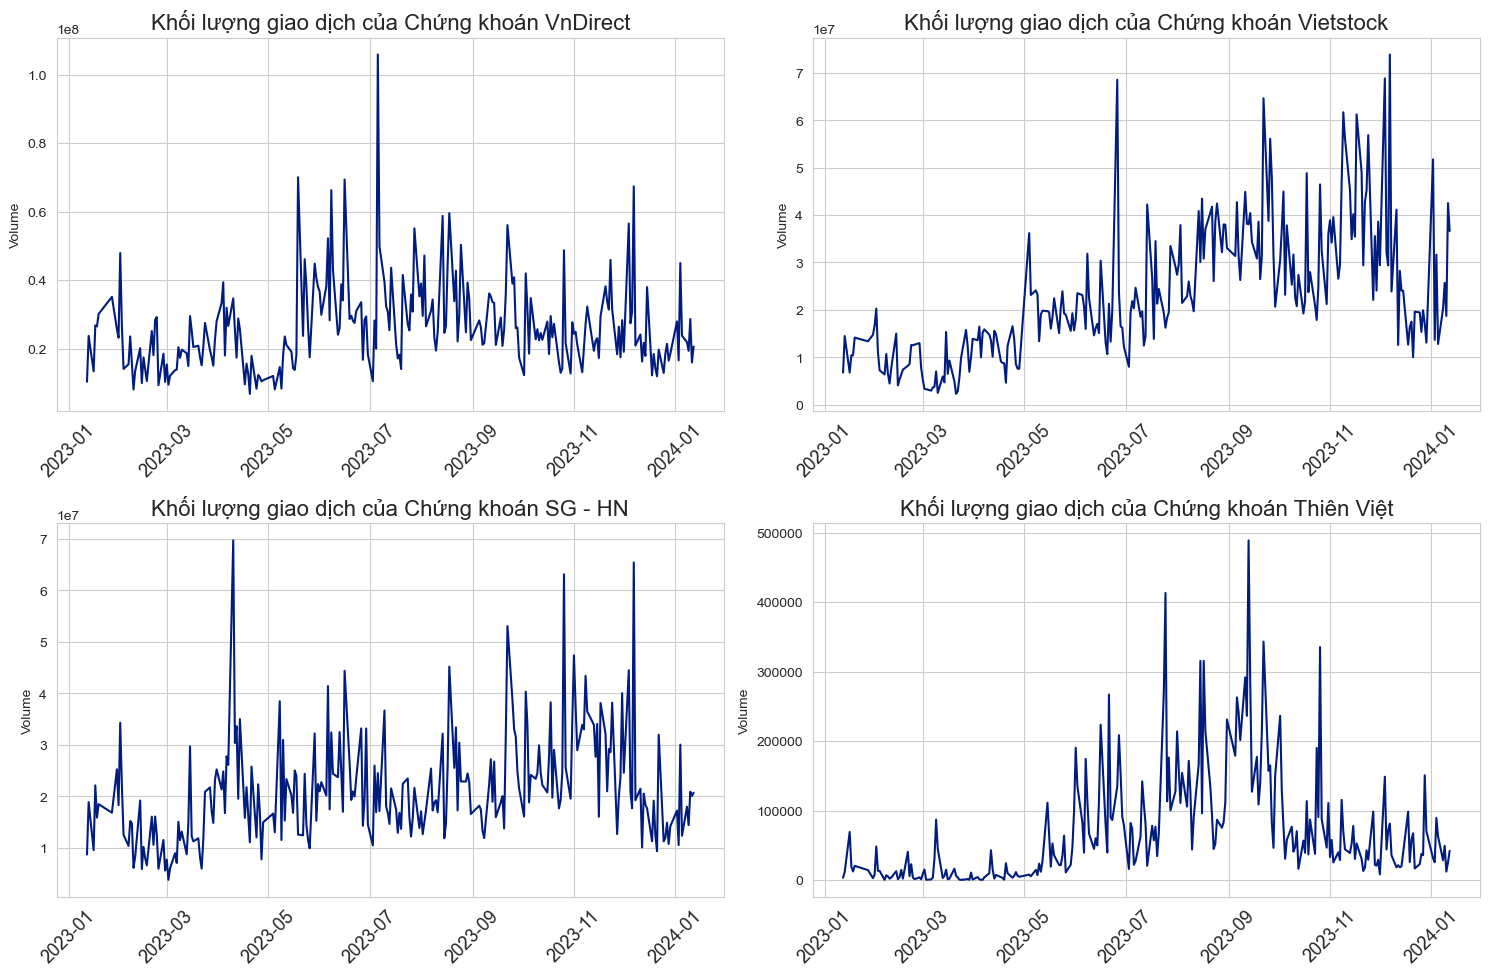

<Figure size 5120x3840 with 0 Axes>

In [12]:
plt.figure(figsize=(15, 10))
sns.set_style('whitegrid')
plt.style.use("seaborn-v0_8-dark-palette")
%matplotlib inline
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    ax = plt.plot(company['volume'] )
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.xticks(rotation = 45, fontsize=13)
    plt.title(f"Khối lượng giao dịch của {company_name[i - 1]}",
             fontsize =16)
    
plt.tight_layout()
#output_file_path = 'Volume.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=800)

## Moving average

<Figure size 5120x3840 with 0 Axes>

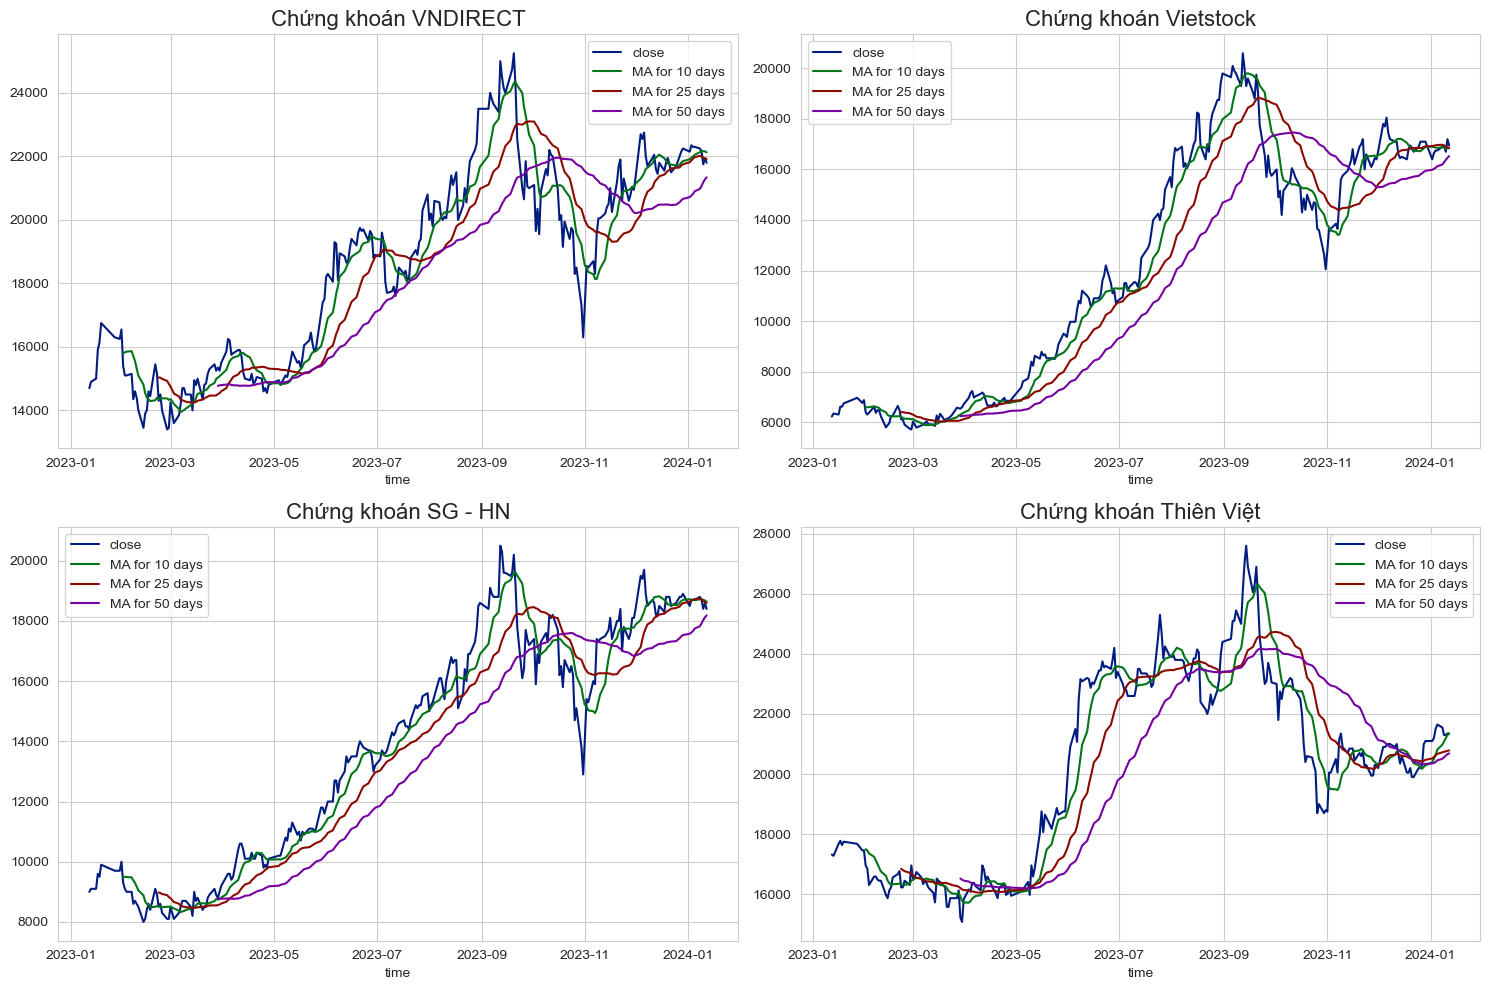

<Figure size 5120x3840 with 0 Axes>

In [13]:
ma_day = [10, 25, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

VND[['close', 'MA for 10 days', 'MA for 25 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('Chứng khoán VNDIRECT', fontsize = 16)

VIX[['close', 'MA for 10 days', 'MA for 25 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('Chứng khoán Vietstock', fontsize = 16)

SHS[['close', 'MA for 10 days', 'MA for 25 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('Chứng khoán SG - HN', fontsize = 16)

TVS[['close', 'MA for 10 days', 'MA for 25 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('Chứng khoán Thiên Việt', fontsize = 16)

fig.tight_layout()
#output_file_path = 'MA.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=800)

## The daily return of the stock on average

<Figure size 5120x3840 with 0 Axes>

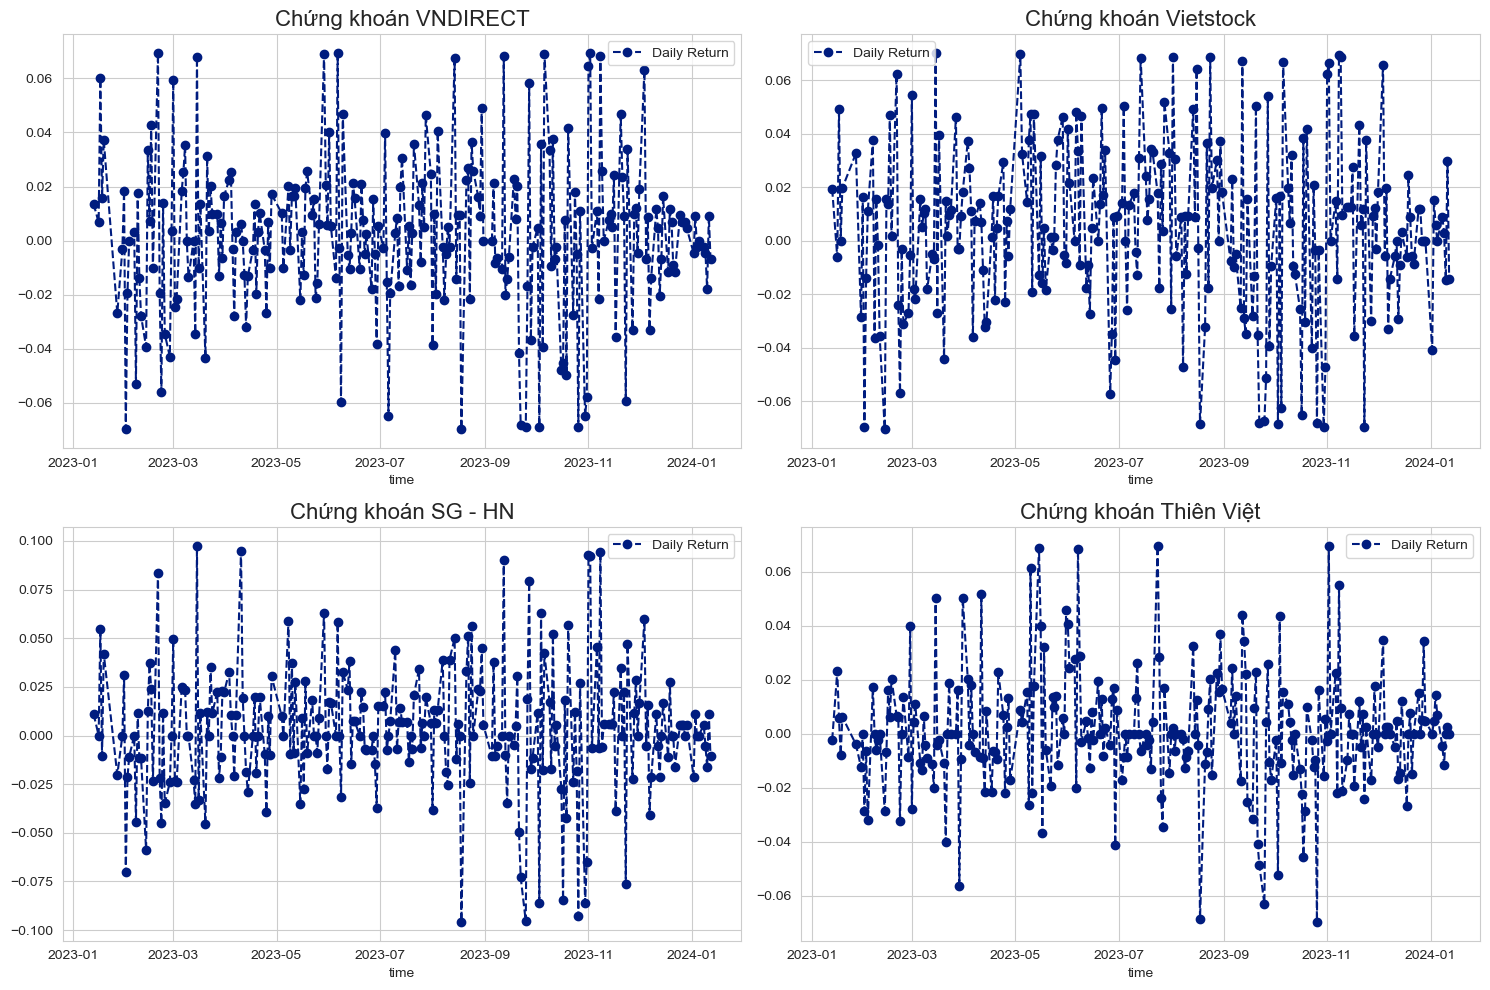

<Figure size 5120x3840 with 0 Axes>

In [14]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

VND['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('Chứng khoán VNDIRECT', fontsize = 16)

VIX['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('Chứng khoán Vietstock', fontsize = 16)

SHS['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('Chứng khoán SG - HN', fontsize = 16)

TVS['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('Chứng khoán Thiên Việt', fontsize = 16)

fig.tight_layout()
#output_file_path = 'return.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=800)

<Figure size 5120x3840 with 0 Axes>

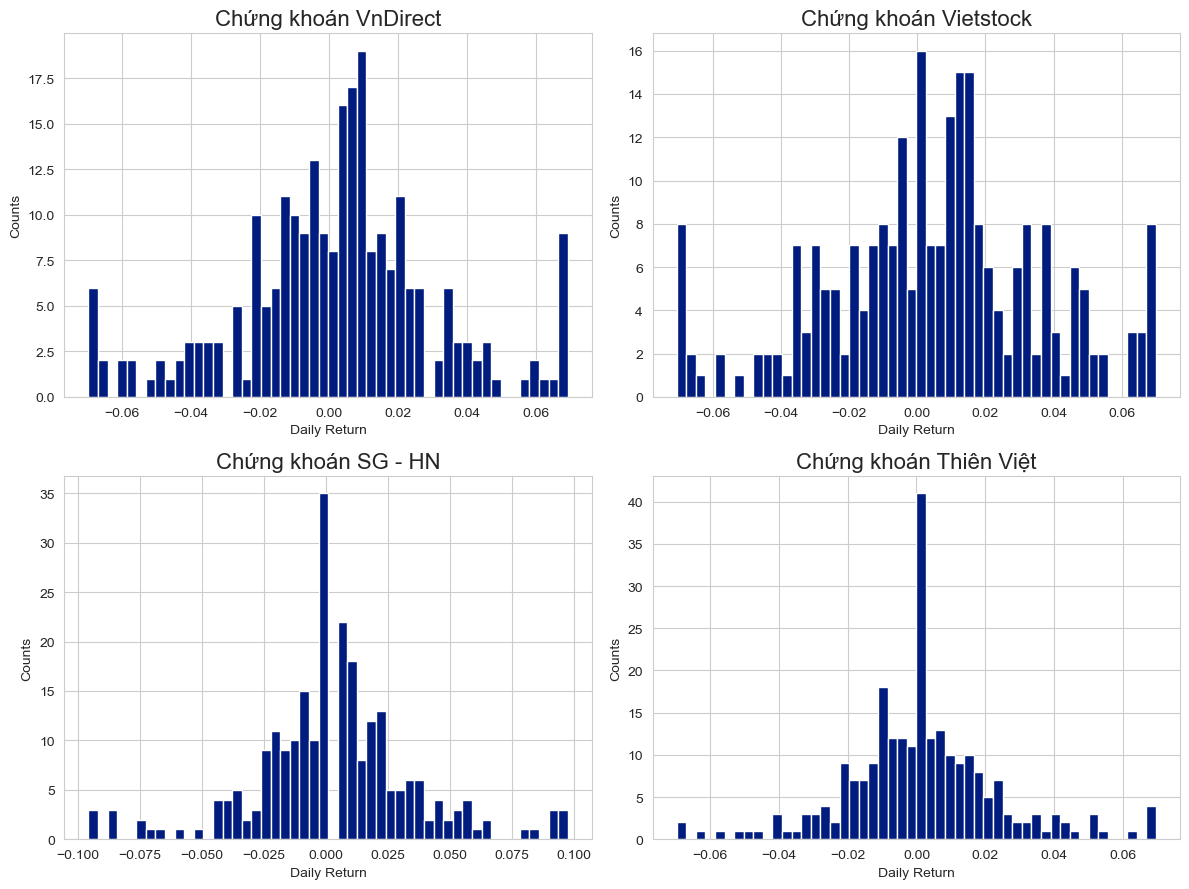

<Figure size 5120x3840 with 0 Axes>

In [15]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}', 
             fontsize = 16)
    
plt.tight_layout()
#output_file_path = 'dist_return.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=800)

## The correlation between different stocks closing prices

In [16]:
df

open   high    low  close    volume ticker  \
time                                                      
2023-01-12  14900  14950  14600  14700  10345600    VND   
2023-01-13  14900  15300  14700  14900  23733700    VND   
2023-01-16  15000  15100  14600  15000  13384900    VND   
2023-01-17  15150  15950  15100  15900  26783900    VND   
2023-01-18  15900  16400  15800  16149  26512200    VND   
...           ...    ...    ...    ...       ...    ...   
2024-01-08  21700  21750  21500  21550     28400    TVS   
2024-01-09  21500  21600  21250  21300     49100    TVS   
2024-01-10  21300  21350  21150  21300     12100    TVS   
2024-01-11  21250  21800  21050  21350     25600    TVS   
2024-01-12  21050  21350  20900  21350     41900    TVS   

                      company_name  
time                                
2023-01-12    Chứng khoán VnDirect  
2023-01-13    Chứng khoán VnDirect  
2023-01-16    Chứng khoán VnDirect  
2023-01-17    Chứng khoán VnDirect  
2023-01-18    Chứng khoán VnDirect  
...                            ...  
2024-01-08  Chứng khoán Thiên Việt  
2024-01-09  Chứng khoán Thiên Việt  
2024-01-10  Chứng khoán Thiên Việt  
2024-01-11  Chứng khoán Thiên Việt  
2024-01-12  Chứng khoán Thiên Việt  

[1004 rows x 7 columns]

In [17]:
df2 = df.reset_index()
df2

time   open   high    low  close    volume ticker  \
0     2023-01-12  14900  14950  14600  14700  10345600    VND   
1     2023-01-13  14900  15300  14700  14900  23733700    VND   
2     2023-01-16  15000  15100  14600  15000  13384900    VND   
3     2023-01-17  15150  15950  15100  15900  26783900    VND   
4     2023-01-18  15900  16400  15800  16149  26512200    VND   
...          ...    ...    ...    ...    ...       ...    ...   
999   2024-01-08  21700  21750  21500  21550     28400    TVS   
1000  2024-01-09  21500  21600  21250  21300     49100    TVS   
1001  2024-01-10  21300  21350  21150  21300     12100    TVS   
1002  2024-01-11  21250  21800  21050  21350     25600    TVS   
1003  2024-01-12  21050  21350  20900  21350     41900    TVS   

                company_name  
0       Chứng khoán VnDirect  
1       Chứng khoán VnDirect  
2       Chứng khoán VnDirect  
3       Chứng khoán VnDirect  
4       Chứng khoán VnDirect  
...                      ...  
999   Chứng khoán Thiên Việt  
1000  Chứng khoán Thiên Việt  
1001  Chứng khoán Thiên Việt  
1002  Chứng khoán Thiên Việt  
1003  Chứng khoán Thiên Việt  

[1004 rows x 8 columns]

In [18]:
# Tạo DataFrame cho từng ticker
df_VND = df2[df2['ticker'] == 'VND'][['time', 'close']].set_index('time').rename(columns={'close': 'VND'})
df_VIX = df2[df2['ticker'] == 'VIX'][['time', 'close']].set_index('time').rename(columns={'close': 'VIX'})
df_SHS = df2[df2['ticker'] == 'SHS'][['time', 'close']].set_index('time').rename(columns={'close': 'SHS'})
df_TVS = df2[df2['ticker'] == 'TVS'][['time', 'close']].set_index('time').rename(columns={'close': 'TVS'})
df_vnindex = vn.stock_historical_data("VNINDEX", start, end, "1D", "index")
df_vnindex = df_vnindex[['time', 'close']].set_index('time').rename(columns={'close': 'VNINDEX'})

df_VND = df_VND.loc[~df_VND.index.duplicated(keep='first')]
df_VIX = df_VIX.loc[~df_VIX.index.duplicated(keep='first')]
df_SHS = df_SHS.loc[~df_SHS.index.duplicated(keep='first')]
df_TVS = df_TVS.loc[~df_TVS.index.duplicated(keep='first')]

# Kết hợp các DataFrame theo cột 'time'
closing_df = pd.concat([df_VND, df_VIX, df_SHS, df_TVS, df_vnindex], axis=1)

# Hiển thị DataFrame mới
closing_df


VND    VIX    SHS    TVS    VNINDEX
time                                             
2023-01-12  14700   6220   9000  17320 1056390.00
2023-01-13  14900   6340   9100  17280 1060170.00
2023-01-16  15000   6300   9100  17680 1066680.00
2023-01-17  15900   6610   9600  17780 1088290.00
2023-01-18  16149   6610   9500  17640 1098280.00
...           ...    ...    ...    ...        ...
2024-01-08  22250  16900  18800  21550 1160190.00
2024-01-09  22150  16950  18700  21300 1158590.00
2024-01-10  21750  16700  18400  21300 1161540.00
2024-01-11  21950  17200  18600  21350 1162220.00
2024-01-12  21800  16950  18400  21350 1154700.00

[251 rows x 5 columns]

In [19]:
stock_rets = closing_df.pct_change()
stock_rets

VND   VIX   SHS   TVS  VNINDEX
time                                       
2023-01-12   NaN   NaN   NaN   NaN      NaN
2023-01-13  0.01  0.02  0.01 -0.00     0.00
2023-01-16  0.01 -0.01  0.00  0.02     0.01
2023-01-17  0.06  0.05  0.05  0.01     0.02
2023-01-18  0.02  0.00 -0.01 -0.01     0.01
...          ...   ...   ...   ...      ...
2024-01-08 -0.00  0.01  0.01 -0.00     0.00
2024-01-09 -0.00  0.00 -0.01 -0.01    -0.00
2024-01-10 -0.02 -0.01 -0.02  0.00     0.00
2024-01-11  0.01  0.03  0.01  0.00     0.00
2024-01-12 -0.01 -0.01 -0.01  0.00    -0.01

[251 rows x 5 columns]

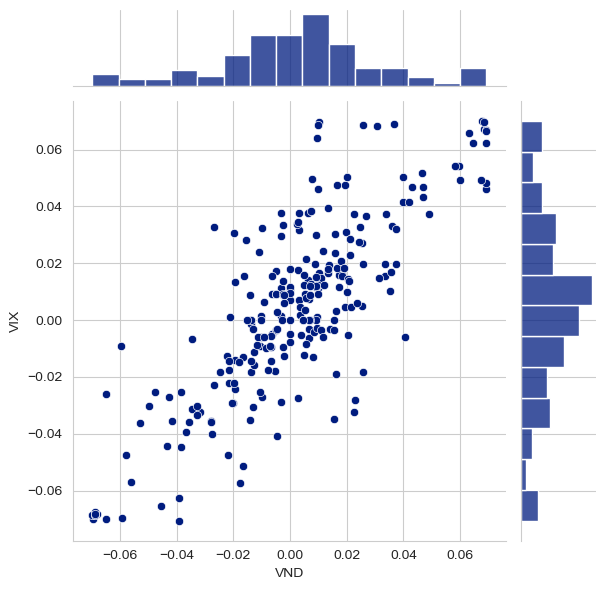

In [20]:
sns.jointplot(x='VND', y='VIX', data=stock_rets.reset_index(), kind='scatter')

<Figure size 12800x9600 with 0 Axes>

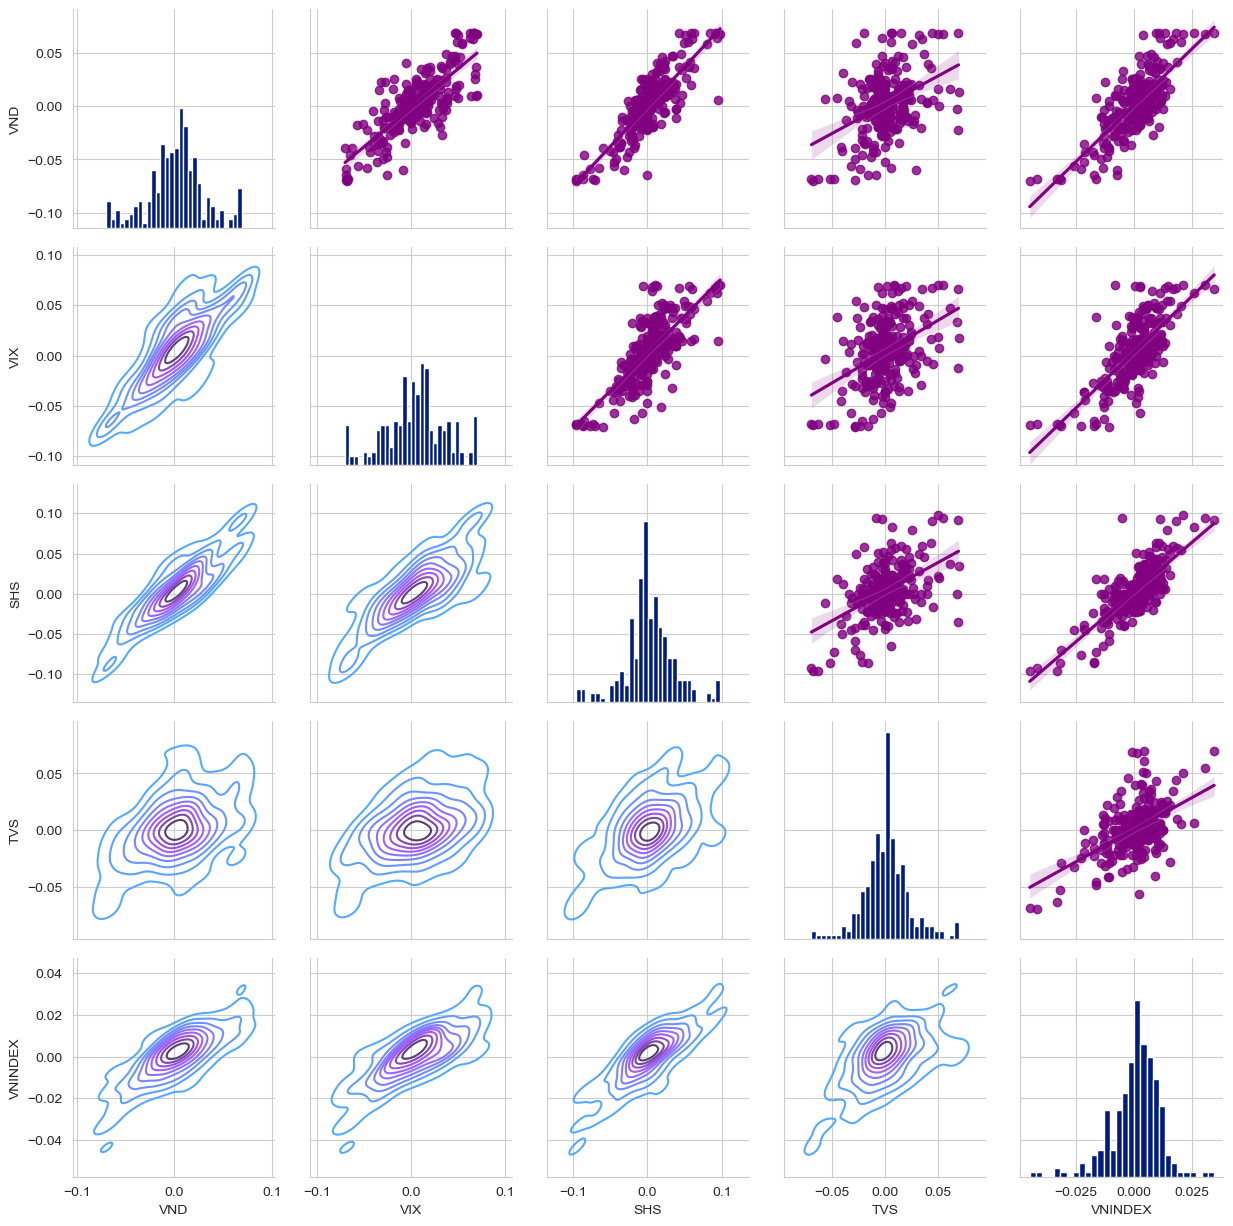

<Figure size 12800x9600 with 0 Axes>

In [21]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(stock_rets.reset_index().dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(sns.regplot, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)
#output_file_path = 'corr_return.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=2000)

<Figure size 12800x9600 with 0 Axes>

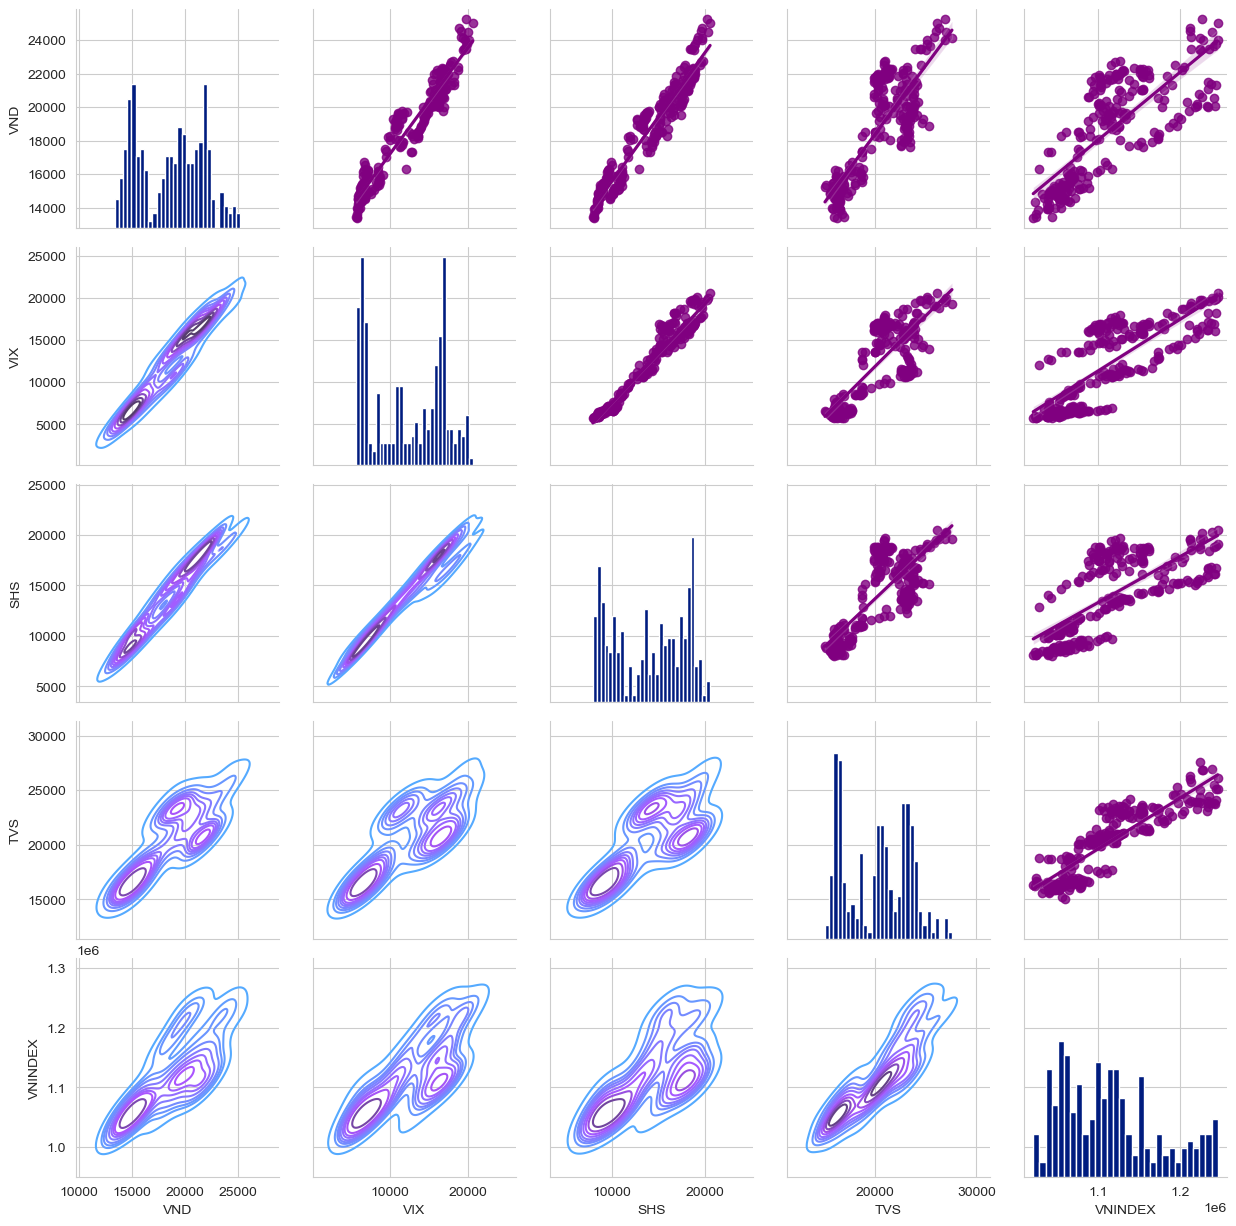

<Figure size 12800x9600 with 0 Axes>

In [22]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(closing_df.reset_index())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(sns.regplot, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)
#output_file_path = 'corr_closing.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=2000)

<Figure size 12800x9600 with 0 Axes>

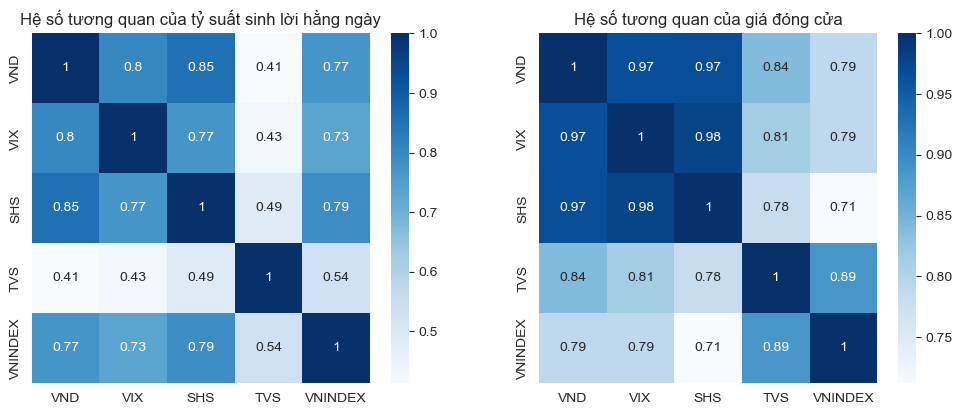

<Figure size 12800x9600 with 0 Axes>

In [23]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(stock_rets.corr(), annot=True, cmap='Blues')
plt.title('Hệ số tương quan của tỷ suất sinh lời hằng ngày')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='Blues')
plt.title('Hệ số tương quan của giá đóng cửa')
#output_file_path = 'corr_return_close.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=2000)

<Figure size 12800x9600 with 0 Axes>

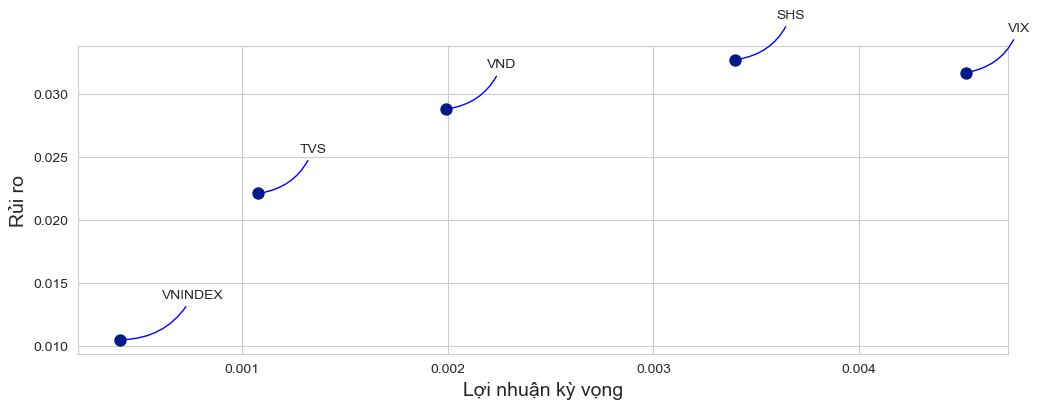

<Figure size 12800x9600 with 0 Axes>

In [24]:
rets = stock_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(12, 4))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Lợi nhuận kỳ vọng', fontsize = 14)
plt.ylabel('Rủi ro', fontsize = 14)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(30, 30), 
                 textcoords='offset points', 
                 arrowprops=dict(arrowstyle='-', 
                                 color='blue', 
                                 connectionstyle='arc3,rad=-0.3')
                )
#output_file_path = 'return_mean_std.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=2000)

In [25]:
end = datetime.now()
start = datetime(end.year - 10, end.month, end.day)

start = start.strftime('%Y-%m-%d')
end = end.strftime('%Y-%m-%d')

data = vn.stock_historical_data('VIX', start, end, resolution='1D',
                                type='stock').set_index("time")
data.head()


open  high   low  close  volume ticker
time                                              
2014-01-13  1430  1430  1430   1430       0    VIX
2014-01-14  1430  1430  1430   1430       0    VIX
2014-01-15  1490  1490  1490   1490    8400    VIX
2014-01-16  1500  1500  1500   1500    5000    VIX
2014-01-17  1500  1520  1500   1520     800    VIX

In [26]:
# Drop duplicate indices

data = data.loc[~data.index.duplicated(keep='first')]  

# Set the frequency to daily and forward fill missing values

data = data.asfreq('D', method='ffill')

data.close

time
2014-01-13     1430
2014-01-14     1430
2014-01-15     1490
2014-01-16     1500
2014-01-17     1520
              ...  
2024-01-08    16900
2024-01-09    16950
2024-01-10    16700
2024-01-11    17200
2024-01-12    16950
Freq: D, Name: close, Length: 3652, dtype: int32

In [27]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [28]:
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-dark-palette')

<Figure size 640x480 with 0 Axes>

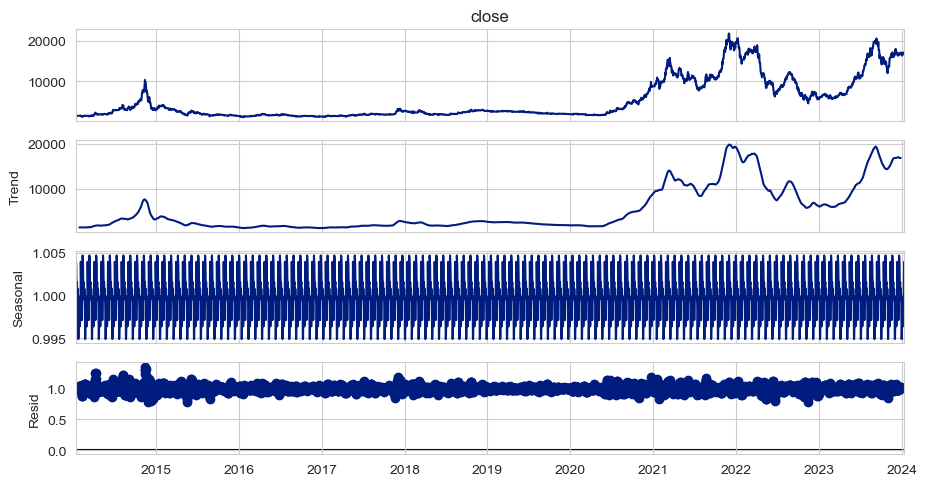

<Figure size 5120x3840 with 0 Axes>

In [29]:
# Checking decomposition of trend, seasonality and residue of the original time series.
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

decomposition = seasonal_decompose(data['close'], 
                                       model='multiplicative', 
                                       period=30)

fig = plt.figure()  
fig = decomposition.plot()
plt.figure(dpi=800)
fig.set_size_inches(10, 5)

plt.show()  # Display the plot


#output_file_path = 'seasonal_decompose.png'
#fig.savefig(output_file_path, format='png', bbox_inches='tight')

plt.close(fig)  # Close the plot


ADF Test:
Null Hypothesis: Not Stationary
ADF Statistic: -1.183632
p-value: 0.680597
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
KPSS Test:
Null Hypothesis: Stationary
KPSS Statistic: 5.420717
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


C:\Users\Admin\AppData\Local\Temp\ipykernel_764\4112367772.py:32: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(stock_close_price, regression='c', nlags=None, store=False)


<Figure size 2400x600 with 0 Axes>

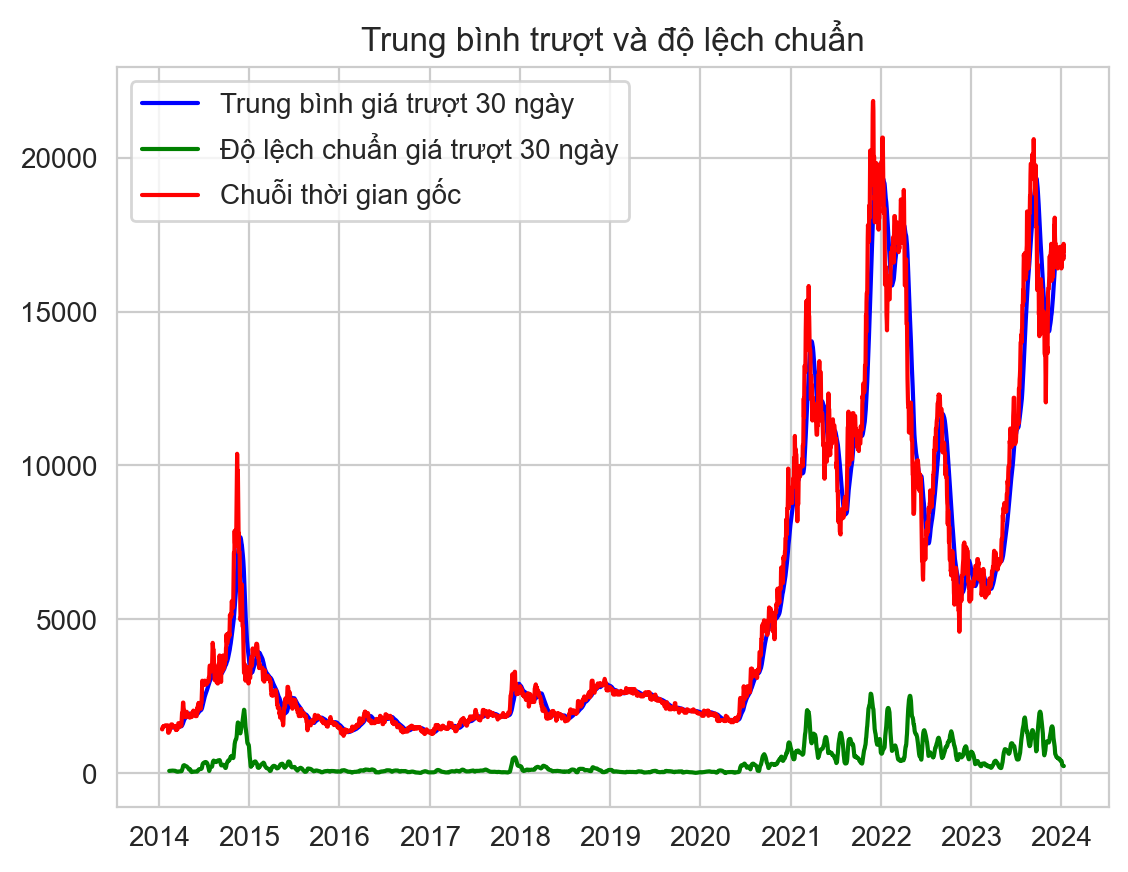

<Figure size 12800x9600 with 0 Axes>

In [30]:
#Testing for stationarity using ADF and KPSS Tests.
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

def stationarity_test(stock_close_price):
    # Calculating rolling mean and rolling standard deviation:
    rolling_mean = stock_close_price.rolling(30).mean()
    rolling_std_dev = stock_close_price.rolling(30).std()
  
    # Plotting the statistics:
    plt.figure(figsize=(24,6))
    plt.figure(dpi=200)
    plt.plot(rolling_mean, color='blue', label='Trung bình giá trượt 30 ngày')
    plt.plot(rolling_std_dev, color='green', label = 'Độ lệch chuẩn giá trượt 30 ngày')
    plt.plot(stock_close_price, color='red',label='Chuỗi thời gian gốc')
    plt.legend(loc='best')
    plt.title('Trung bình trượt và độ lệch chuẩn')
    #output_file_path = 'rolling_mean_std_close.png'
    #plt.savefig(output_file_path, format='png', bbox_inches='tight')
    plt.figure(dpi=2000)
    
    print("ADF Test:")
    adf_test = adfuller(stock_close_price,autolag='AIC')
    print('Null Hypothesis: Not Stationary')
    print('ADF Statistic: %f' % adf_test[0])
    print('p-value: %f' % adf_test[1])
    print('Critical Values:')
    for key, value in adf_test[4].items():
        print('\t%s: %.3f' % (key, value))

    print("KPSS Test:")
    kpss_test = kpss(stock_close_price, regression='c', nlags=None, store=False)
    print('Null Hypothesis: Stationary')
    print('KPSS Statistic: %f' % kpss_test[0])
    print('p-value: %f' % kpss_test[1])
    print('Critical Values:')
    for key, value in kpss_test[3].items():
        print('\t%s: %.3f' % (key, value))
    
stationarity_test(data['close'])

In [31]:

data['Close_Log'] = np.log(data['close'])
data['Close_Detrend'] = (data['close'] - data['close'].shift(30))
data['Close_Detrend'] = data['Close_Detrend'].dropna()
data['Close_Detrend_log'] = (data['Close_Log'] - data['Close_Log'].shift(30))

ADF Test:
Null Hypothesis: Not Stationary
ADF Statistic: -6.031880
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
KPSS Test:
Null Hypothesis: Stationary
KPSS Statistic: 0.117878
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


C:\Users\Admin\AppData\Local\Temp\ipykernel_764\1857922386.py:29: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(stock_close_price, regression='c', nlags=None, store=False)


<Figure size 2400x600 with 0 Axes>

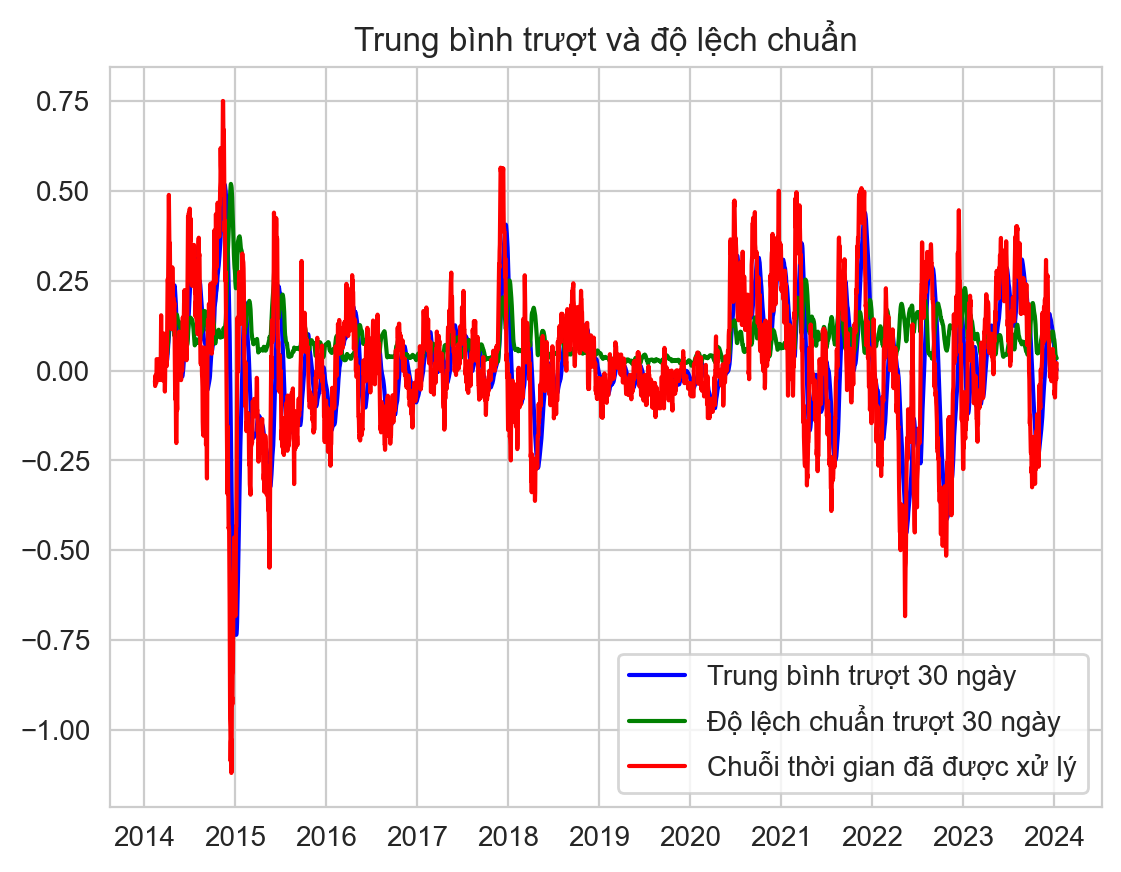

<Figure size 12800x9600 with 0 Axes>

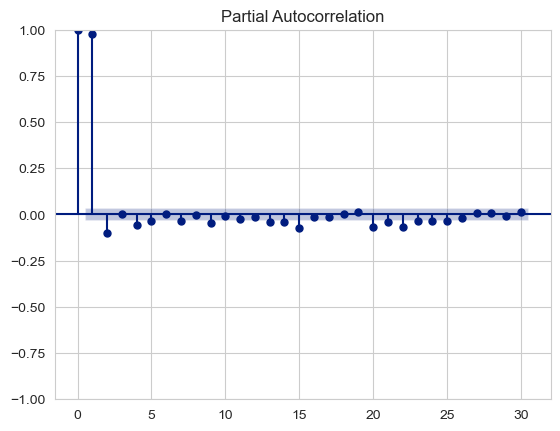

In [32]:
#Testing for stationarity of de-trended time series using ADF and KPSS Tests.
def stationarity_test(stock_close_price):
    # Calculating rolling mean and rolling standard deviation:
    rolling_mean = stock_close_price.rolling(30).mean()
    rolling_std_dev = stock_close_price.rolling(30).std()
  
    # Plotting the statistics:
    plt.figure(figsize=(24,6))
    plt.figure(dpi=200)
    plt.plot(rolling_mean, color='blue', label='Trung bình trượt 30 ngày')
    plt.plot(rolling_std_dev, color='green', label = 'Độ lệch chuẩn trượt 30 ngày')
    plt.plot(stock_close_price, color='red',label='Chuỗi thời gian đã được xử lý')
    plt.legend(loc='best')
    plt.title('Trung bình trượt và độ lệch chuẩn')
    #output_file_path = 'rolling_mean_std_close_detrend.png'
    #plt.savefig(output_file_path, format='png', bbox_inches='tight')
    plt.figure(dpi=2000)
    
    print("ADF Test:")
    adf_test = adfuller(stock_close_price,autolag='AIC')
    print('Null Hypothesis: Not Stationary')
    print('ADF Statistic: %f' % adf_test[0])
    print('p-value: %f' % adf_test[1])
    print('Critical Values:')
    for key, value in adf_test[4].items():
        print('\t%s: %.3f' % (key, value))

    print("KPSS Test:")
    kpss_test = kpss(stock_close_price, regression='c', nlags=None, store=False)
    print('Null Hypothesis: Stationary')
    print('KPSS Statistic: %f' % kpss_test[0])
    print('p-value: %f' % kpss_test[1])
    print('Critical Values:')
    for key, value in kpss_test[3].items():
        print('\t%s: %.3f' % (key, value))

stationarity_test(data['Close_Detrend_log'].dropna())

# PACF Plot
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(data['Close_Detrend_log'].dropna(), lags=30)


<Figure size 12800x9600 with 0 Axes>

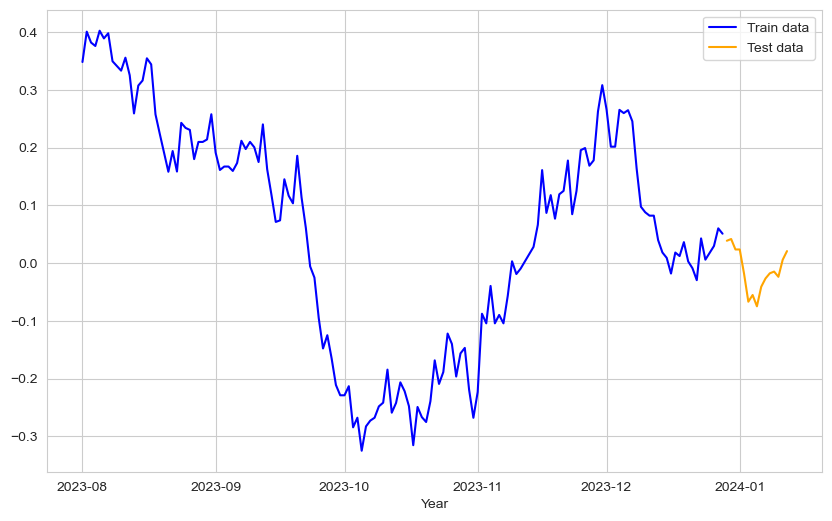

<Figure size 12800x9600 with 0 Axes>

In [33]:
#split data into train and training set
Stock_data_arima = data['Close_Detrend_log'].dropna()
test_size = 15
train_data, test_data = Stock_data_arima[:-test_size], Stock_data_arima[-test_size:]


# Plotting the train and test sets.
plt.figure(figsize=(10,6))
plt.xlabel('Year')
#plt.ylabel('Closing Price')
plt.plot(train_data[-150:], 'blue', label='Train data')
plt.plot(test_data, 'orange', label='Test data')
plt.legend()
#output_file_path = 'train_test.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=2000)

In [34]:
from pmdarima import auto_arima
from math import *
from statsmodels.tsa.arima.model import ARIMA


 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1557.115, Time=0.33 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-5580.441, Time=0.52 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-8085.683, Time=1.59 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-9409.913, Time=1.69 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-12636.855, Time=0.37 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-12670.300, Time=1.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-12668.309, Time=0.63 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-12674.804, Time=0.83 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-12670.210, Time=0.89 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-12668.213, Time=0.59 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-12695.436, Time=1.66 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-12680.846, Time=0.41 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-12668.211, Time=1.33 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-12667.086, Time=1.27 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-12667.696

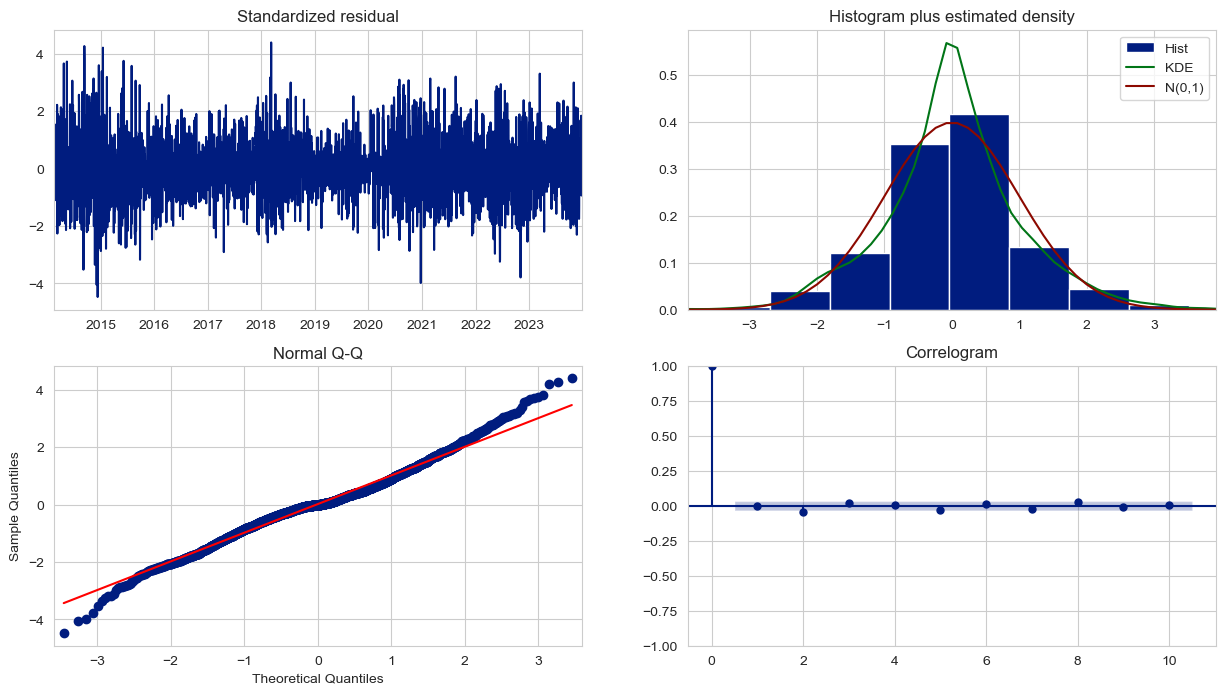

In [35]:

model = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=False)
print(model.summary())
model.plot_diagnostics(figsize=(15,8))

# Save the plot as a PNG file
#output_file_path = 'ARIMA_Diagnostics.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')

# Show the plot (optional)
plt.show()
plt.close()

In [36]:
prediction, confint = model.predict(n_periods= test_size, alpha=0.05, return_conf_int=True)


In [37]:
cf= pd.DataFrame(confint)

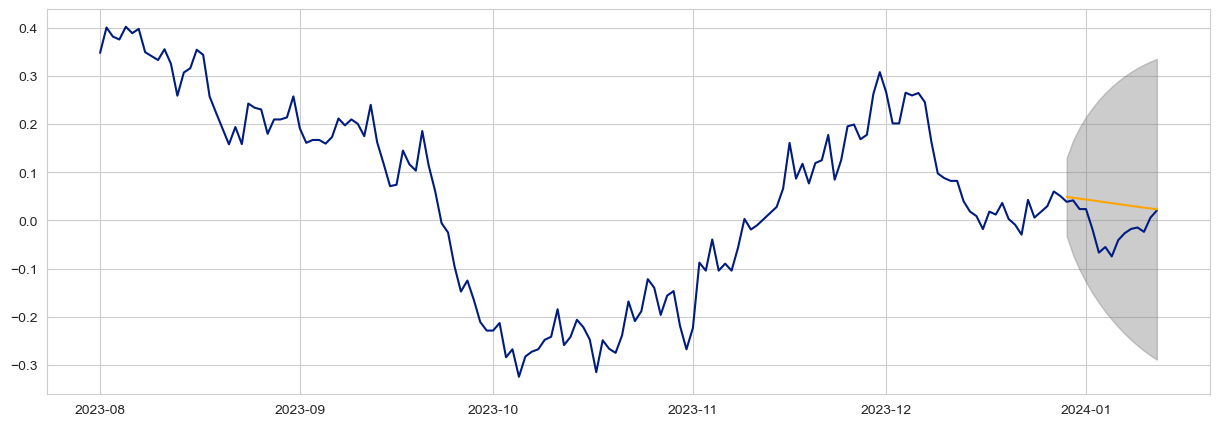

In [38]:
prediction_series = pd.Series(prediction,index=test_data.index)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(Stock_data_arima.last('6M'))
ax.plot(prediction_series, color = 'orange')
ax.fill_between(prediction_series.index,
                cf[0],
                cf[1],color='grey',alpha=.4)
# Save the plot as a PNG file
#output_file_path = 'ARIMA_TEST.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')

# Show the plot (optional)
plt.show()

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1578.056, Time=0.31 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-5617.201, Time=0.42 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-8131.633, Time=1.11 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-9462.337, Time=1.64 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-12700.177, Time=0.33 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-12733.843, Time=0.54 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-12731.851, Time=0.67 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-12738.428, Time=0.83 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-12733.770, Time=0.52 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-12731.771, Time=0.70 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-12764.981, Time=2.58 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-12744.513, Time=0.39 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-12731.770, Time=0.77 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-12730.634, Time=0.99 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-12730.903

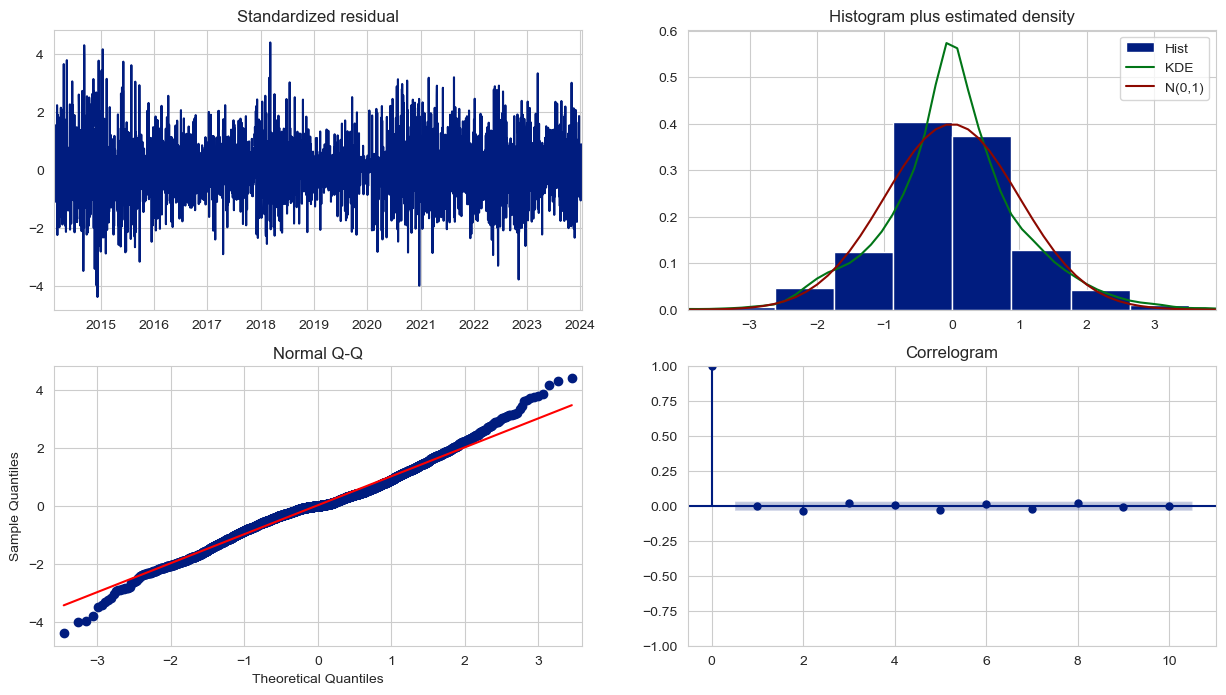

In [39]:
model = auto_arima(Stock_data_arima, start_p=0, start_q=0,
                   test='adf',
                   max_p=3, max_q=3,
                   m=1,
                   d=None,
                   seasonal=False,
                   start_P=0,
                   D=0,
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=False)

print(model.summary())
model.plot_diagnostics(figsize=(15, 8))
plt.show()

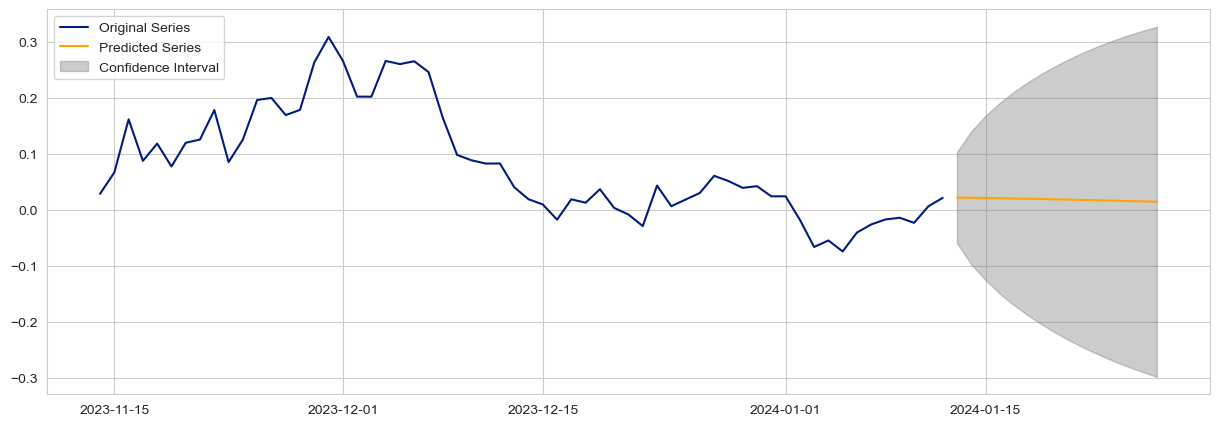

In [40]:
# Predict the next 180 days
forecast, confint = model.predict(n_periods=15, 
                                  alpha=0.05, 
                                  return_conf_int=True)

# Create a DataFrame for confidence intervals
cf = pd.DataFrame(confint, columns=['lower', 'upper'])

# Create a time index for the next 180 days
next_15_days_index = pd.date_range(start=Stock_data_arima.index[-1] 
                                    + pd.DateOffset(1), 
                                    periods=15)

# Create a Series for the prediction with the new time index
prediction_series = pd.Series(forecast, index=next_15_days_index)

# Plot the original series and the predicted series with confidence intervals
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(Stock_data_arima[-60:], label='Original Series')
ax.plot(prediction_series, label='Predicted Series', color = 'orange')
ax.fill_between(prediction_series.index, 
                cf['lower'], cf['upper'], 
                color='grey', alpha=0.4, 
                label='Confidence Interval')
ax.legend(loc = 'upper left')

# Save the plot as a PNG file
output_file_path = 'ARIMA_predict_15.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')

# Show the plot (optional)
plt.show()
plt.close()

In [41]:
returns =  100* data.close.pct_change().dropna()

Text(0.5, 1.0, 'VIX Returns')

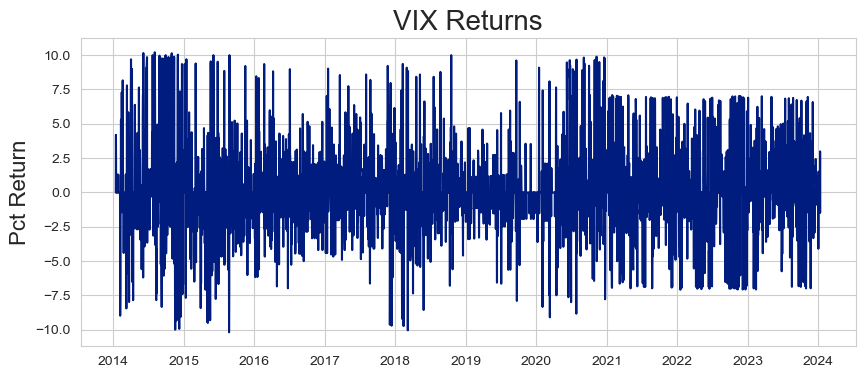

In [42]:

plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('VIX Returns', fontsize=20)

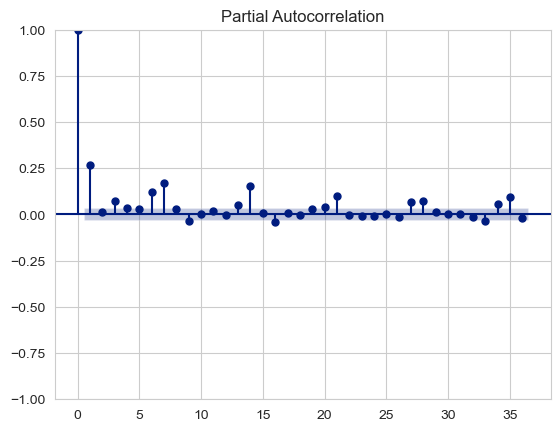

In [43]:
plot_pacf(returns**2)


#output_file_path = 'PACF_RET.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')


plt.show()
plt.close()

In [44]:
from arch import arch_model
model = arch_model(returns, p=1, q=1)

In [45]:

model_fit = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 8557321487.499073
Iteration:      2,   Func. Count:     15,   Neg. LLF: 19625.452912923007
Iteration:      3,   Func. Count:     24,   Neg. LLF: 10994.761021651979
Iteration:      4,   Func. Count:     33,   Neg. LLF: 9001.060584665734
Iteration:      5,   Func. Count:     39,   Neg. LLF: 8960.452079665674
Iteration:      6,   Func. Count:     45,   Neg. LLF: 8960.479730327585
Iteration:      7,   Func. Count:     51,   Neg. LLF: 8960.388152251924
Iteration:      8,   Func. Count:     55,   Neg. LLF: 8960.388152248655
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8960.388152251924
            Iterations: 8
            Function evaluations: 55
            Gradient evaluations: 8


In [46]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8960.39
Distribution:                  Normal   AIC:                           17928.8
Method:            Maximum Likelihood   BIC:                           17953.6
                                        No. Observations:                 3651
Date:                Fri, Jan 12 2024   Df Residuals:                     3650
Time:                        22:32:10   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1029  4.490e-02      2.292  2.188e-02 [1.493e-02,  0.191]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.1483      0.110      1.345      0.178  [-6.775e-02,  0.364]
alpha[1]       0.0470  1.511e-02      3.113  1.850e-03 [1.743e-02,7.665e-02]
beta[1]        0.9362  2.678e-02     34.965 7.775e-268     [  0.884,  0.989]
============================================================================

Covariance estimator: robust
"""

In [47]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [48]:
rolling_predictions = pd.Series(rolling_predictions, 
                                index=returns.index[-365:])

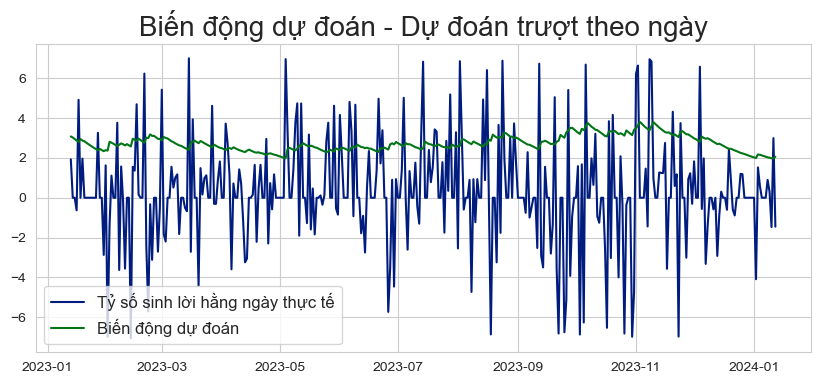

In [49]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Biến động dự đoán - Dự đoán trượt theo ngày', fontsize=20)
plt.legend(['Tỷ số sinh lời hằng ngày thực tế', 'Biến động dự đoán'],
           loc = 'lower left', fontsize=12)
# Save the plot as a PNG file
#output_file_path = 'Garch_roll.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')

# Show the plot (optional)
plt.show()
plt.close()

In [50]:
from datetime import timedelta

pred = model_fit.forecast(horizon=15)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,16)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

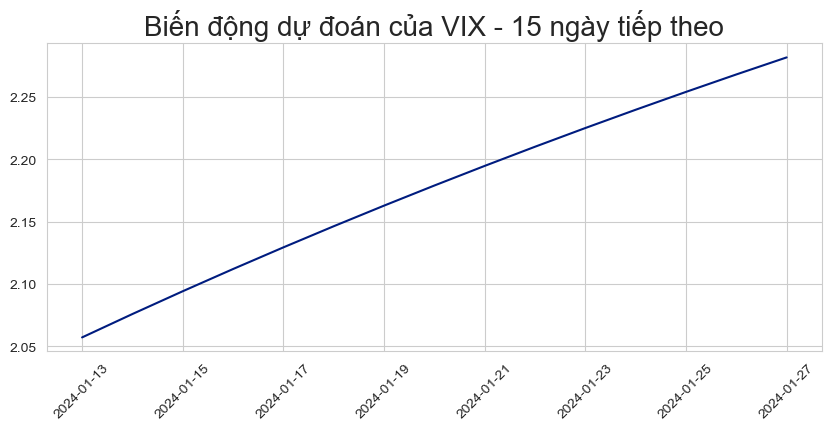

In [51]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.xticks(rotation = 45)
plt.title('Biến động dự đoán của VIX - 15 ngày tiếp theo', fontsize=20)
#output_file_path = 'Garch_15.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')

# Show the plot (optional)
plt.show()
#plt.close()

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-4400.807, Time=0.33 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-8748.032, Time=0.61 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-11099.133, Time=1.32 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-12649.337, Time=2.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-16072.280, Time=0.20 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-16071.803, Time=0.61 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-16070.483, Time=0.74 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-16088.803, Time=0.94 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-16071.757, Time=0.59 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-16090.597, Time=2.60 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-16069.146, Time=0.80 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-16088.554, Time=1.30 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-16070.844, Time=0.81 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-16073.479, Time=1.62 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-16095.8

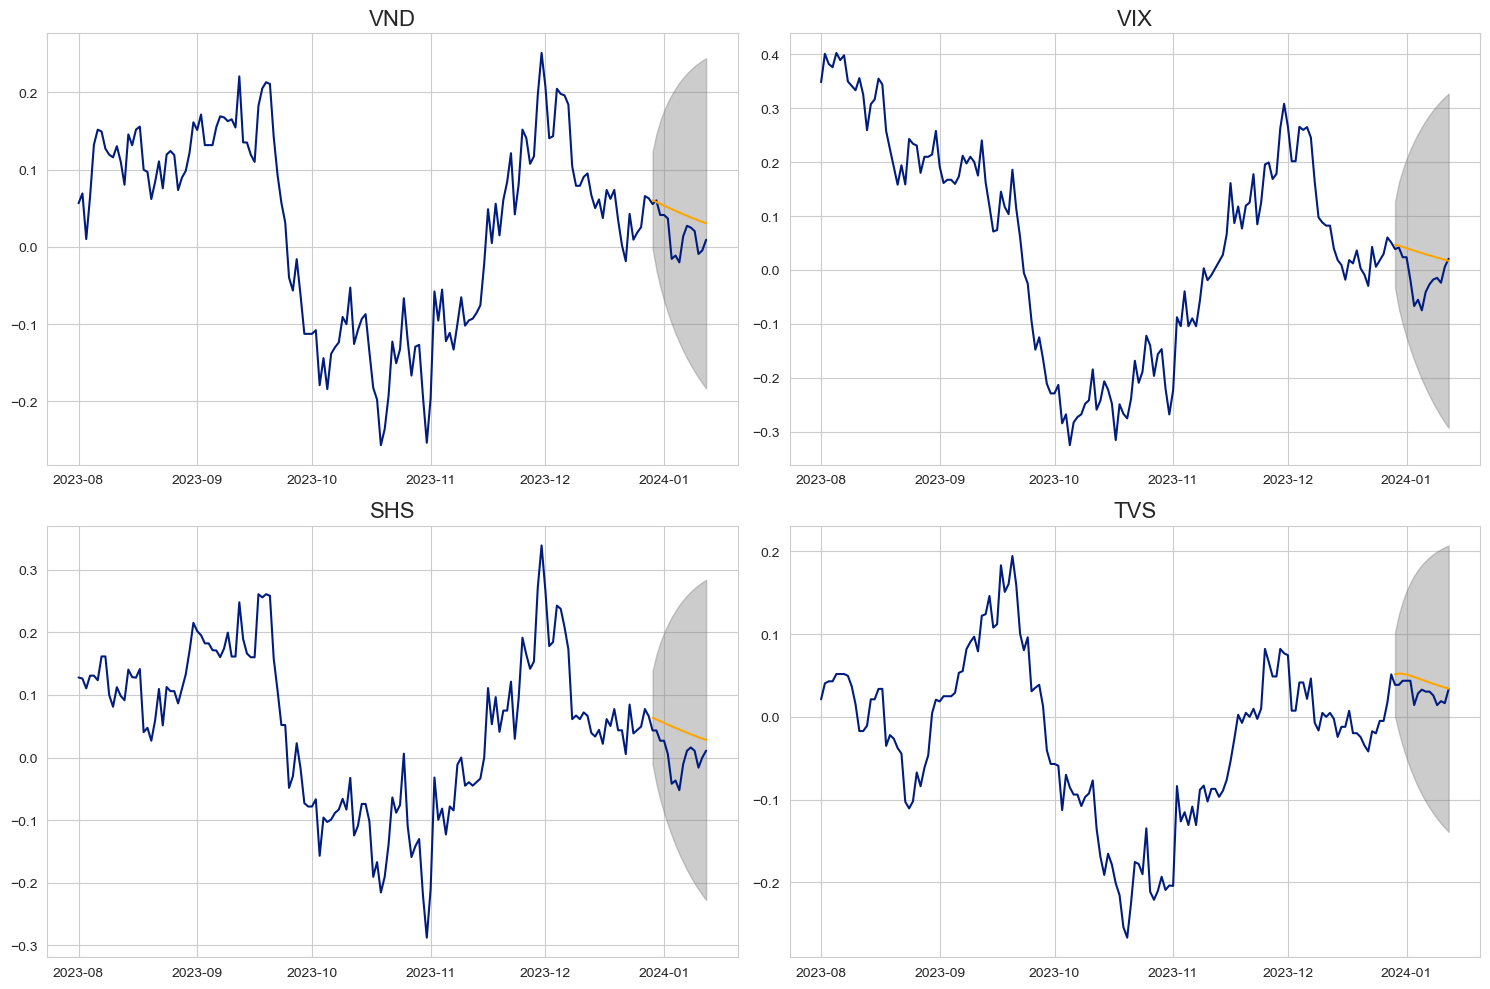

In [52]:
import math
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from datetime import datetime 
import vnstock as vn

# List of stock codes
last_stock_list = ["VND", "VIX", "SHS", "TVS"]

end = datetime.now()
start = datetime(end.year - 11, end.month, end.day)

start = start.strftime('%Y-%m-%d')
end = end.strftime('%Y-%m-%d')

# Determine the number of rows for the subplot
n = len(last_stock_list)
ncols = 2
nrows = math.ceil(n / ncols)

fig, axs = plt.subplots(nrows, ncols, figsize=(15, 5*nrows))

for i, stock_code in enumerate(last_stock_list):
    data = vn.stock_historical_data(stock_code, start, end, resolution='1D', type='stock').set_index("time")
    data = data.loc[~data.index.duplicated(keep='first')]  
    data = data.asfreq('D', method='ffill')
    data['Close_Log'] = np.log(data['close'])
    data['Close_Detrend'] = (data['close'] - data['close'].shift(30))
    data['Close_Detrend'] = data['Close_Detrend'].dropna()
    data['Close_Detrend_log'] = (data['Close_Log'] - data['Close_Log'].shift(30))
    

    Stock_data_arima = data['Close_Detrend_log'].dropna()
    test_size = 15
    train_data, test_data = Stock_data_arima[:-test_size], Stock_data_arima[-test_size:]

    model = auto_arima(train_data, start_p=0, start_q=0,
                          test='adf',       
                          max_p=3, max_q=3, 
                          m=1,              
                          d=None,           
                          seasonal=False,   
                          start_P=0, 
                          D=0, 
                          trace=True,
                          error_action='ignore',  
                          suppress_warnings=True, 
                          stepwise=False)

    prediction, confint = model.predict(n_periods= test_size, alpha=0.05, return_conf_int=True)
    cf= pd.DataFrame(confint)

    prediction_series = pd.Series(prediction,index=test_data.index)

    ax = axs[i//ncols, i%ncols]
    ax.plot(Stock_data_arima.last('6M'))
    ax.plot(prediction_series, color = 'orange')
    ax.fill_between(prediction_series.index, cf[0], cf[1], color='grey', alpha=.4)
    ax.set_title(stock_code, fontsize = 16)

plt.tight_layout()
#output_file_path = 'ARIMA_ALL_TEST.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.show()
#plt.close()

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-4431.719, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-8793.134, Time=0.62 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-11153.114, Time=1.45 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-12709.164, Time=2.31 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-16142.667, Time=0.20 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-16142.183, Time=1.09 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-16140.865, Time=0.73 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-16159.080, Time=0.82 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-16142.138, Time=0.50 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-16159.127, Time=1.72 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-16139.620, Time=0.44 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-16158.656, Time=1.45 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-16141.223, Time=0.93 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-16143.863, Time=0.92 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-16136.1

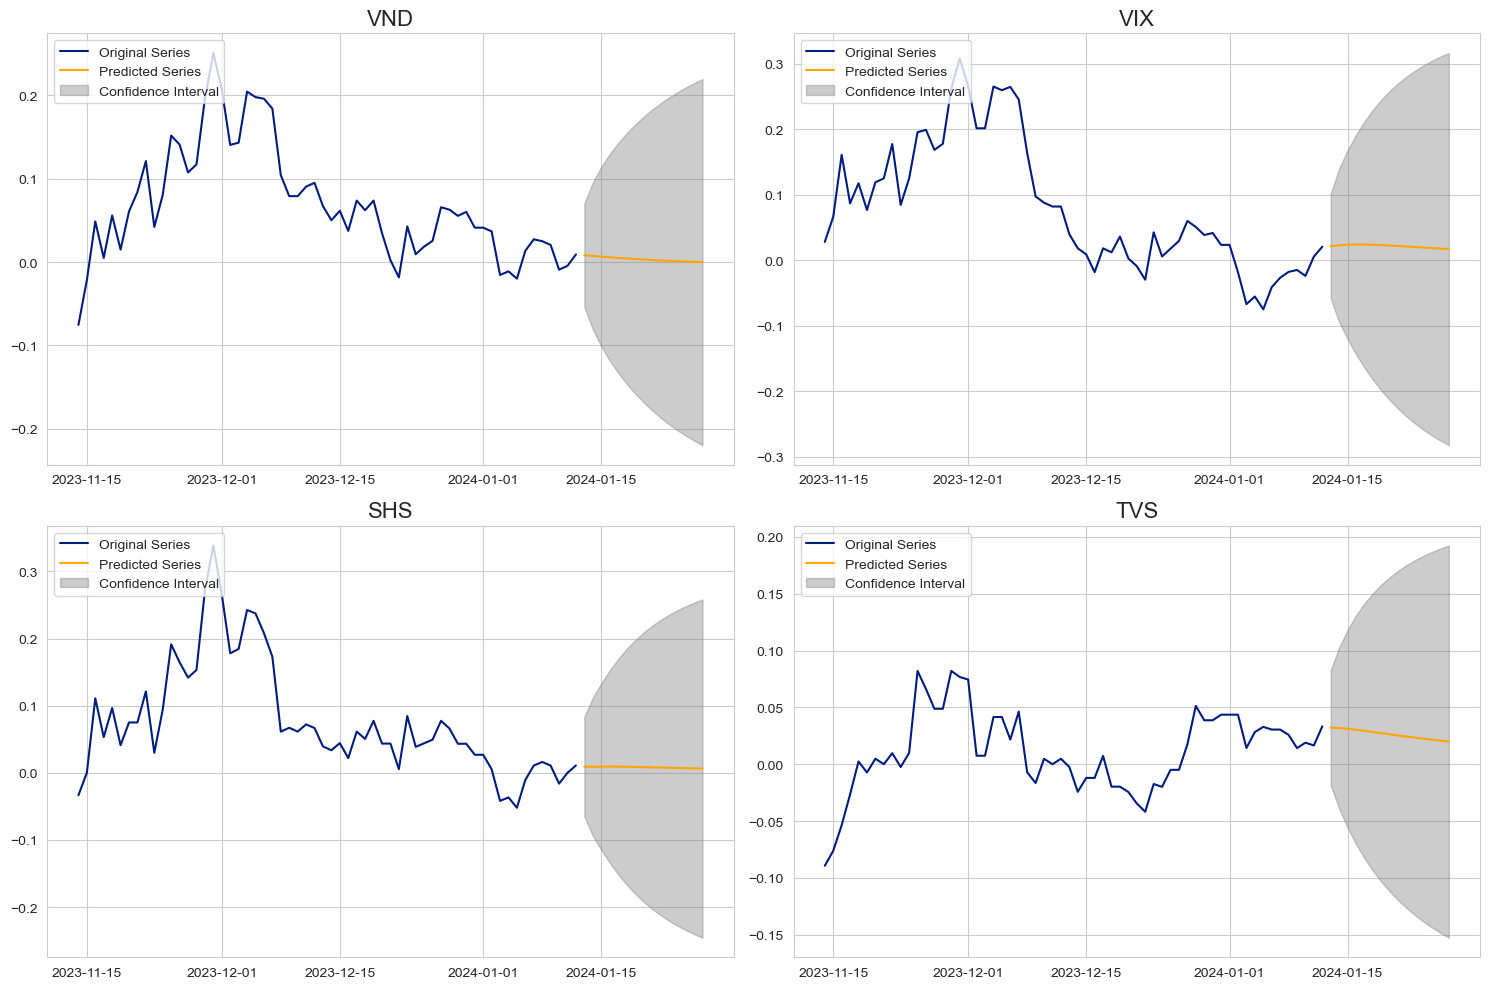

In [53]:
from pmdarima import auto_arima
from datetime import datetime 
import vnstock as vn
import math
import matplotlib.pyplot as plt

# List of stock codes
last_stock_list = ["VND", "VIX", "SHS", "TVS"]

end = datetime.now()
start = datetime(end.year - 11, end.month, end.day)

start = start.strftime('%Y-%m-%d')
end = end.strftime('%Y-%m-%d')
test_size = 15

fig, axs = plt.subplots(math.ceil(len(last_stock_list) / 2), 2, figsize=(15, 5 * math.ceil(len(last_stock_list) / 2)))

for i, stock_code in enumerate(last_stock_list):
    data = vn.stock_historical_data(stock_code, start, end, resolution='1D',
                                    type='stock').set_index("time")
    data = data.loc[~data.index.duplicated(keep='first')]  
    data = data.asfreq('D', method='ffill')
    data['Close_Log'] = np.log(data['close'])
    data['Close_Detrend'] = (data['close'] - data['close'].shift(30))
    data['Close_Detrend'] = data['Close_Detrend'].dropna()
    data['Close_Detrend_log'] = (data['Close_Log'] - data['Close_Log'].shift(30))


    Stock_data_arima = data['Close_Detrend_log'].dropna()
    train_data, test_data = Stock_data_arima[:-test_size], Stock_data_arima[-test_size:]

    model = auto_arima(Stock_data_arima, start_p=0, start_q=0,
                       test='adf',
                       max_p=3, max_q=3,
                       m=1,
                       d=None,
                       seasonal=False,
                       start_P=0,
                       D=0,
                       trace=True,
                       error_action='ignore',
                       suppress_warnings=True,
                       stepwise= False)

    forecast, confint = model.predict(n_periods=15, 
                                      alpha=0.05, 
                                      return_conf_int=True)

    cf = pd.DataFrame(confint, columns=['lower', 'upper'])
    next_15_days_index = pd.date_range(start=Stock_data_arima.index[-1] 
                                        + pd.DateOffset(1), 
                                        periods=15)
    prediction_series = pd.Series(forecast, index=next_15_days_index)

    ax = axs[i // 2, i % 2]
    ax.plot(Stock_data_arima[-60:], label='Original Series')
    ax.plot(prediction_series, label='Predicted Series', color = 'orange')
    ax.fill_between(prediction_series.index, 
                    cf['lower'], cf['upper'], 
                    color='grey', alpha=0.4, 
                    label='Confidence Interval')
    ax.legend(loc = 'upper left')
    ax.set_title(stock_code, fontsize = 16)

plt.tight_layout()
#output_file_path = 'ARIMA_ALL_FORC.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.show()
#plt.close()

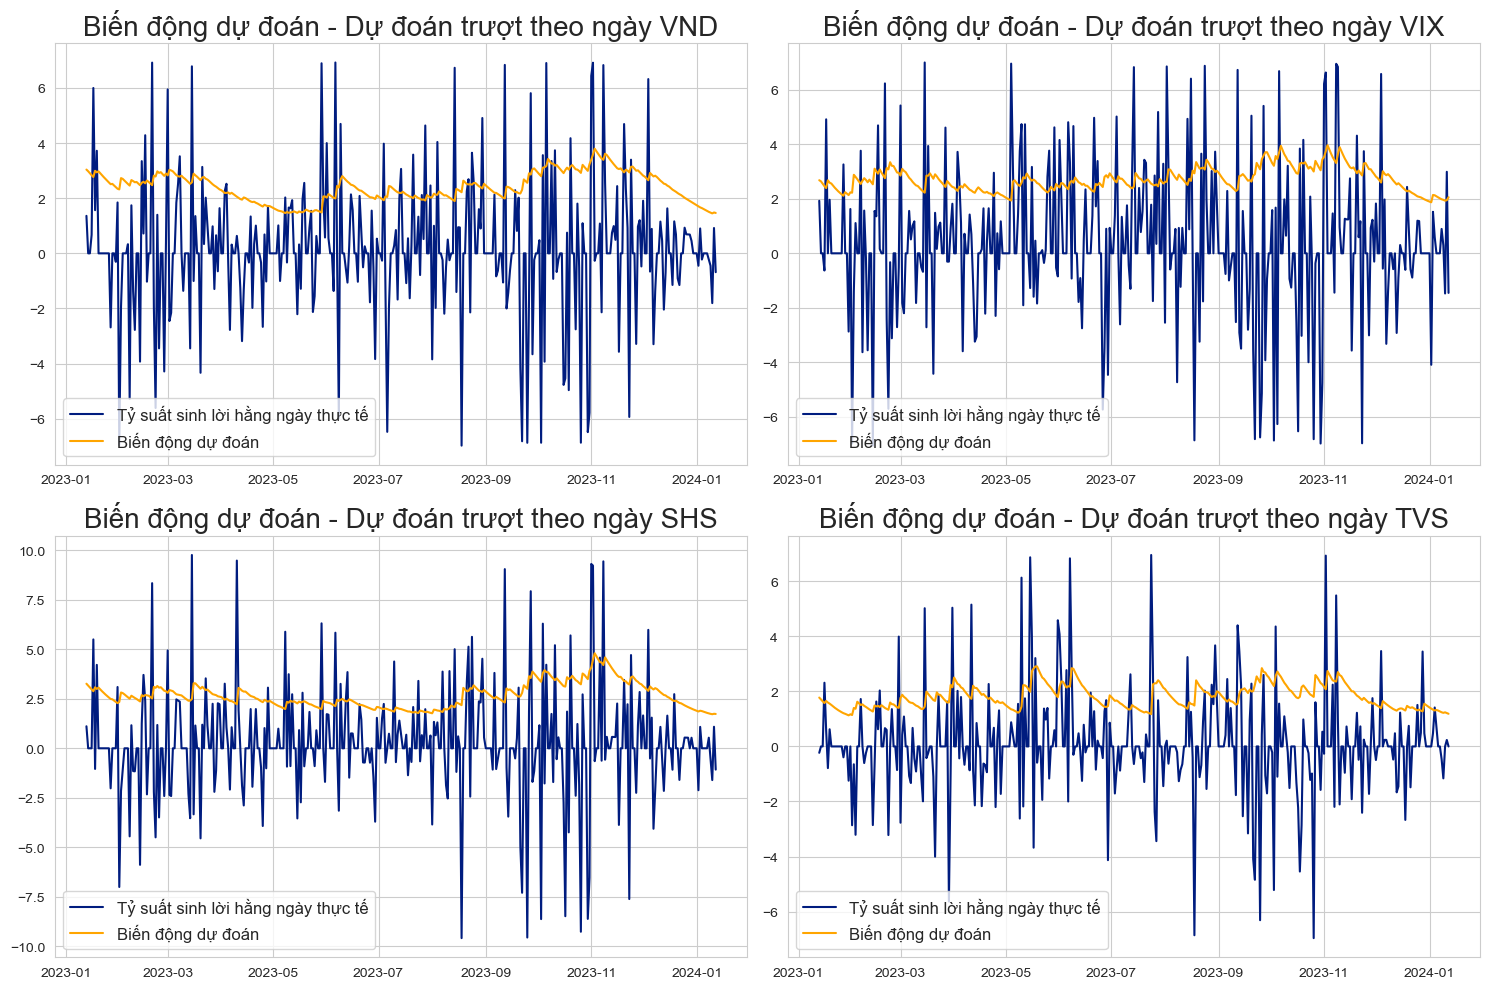

In [54]:
from pmdarima import auto_arima
from math import *
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime 
from dateutil.relativedelta import relativedelta
from arch import arch_model
import vnstock as vn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

end = datetime.now()
start = datetime(end.year - 11, end.month, end.day)

start = start.strftime('%Y-%m-%d')
end = end.strftime('%Y-%m-%d')

last_stock_list = ["VND", "VIX", "SHS", "TVS"]
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, stock_code in enumerate(last_stock_list):
    data = vn.stock_historical_data(stock_code, start, end, resolution='1D',
                                    type='stock').set_index("time")
    data = data.loc[~data.index.duplicated(keep='first')]  

    # Set the frequency to daily and forward fill missing values
    data = data.asfreq('D', method='ffill')
    data['Close_Log'] = np.log(data['close'])

    returns =  100* data.close.pct_change().dropna()

    rolling_predictions = []
    test_size = 365

    for j in range(test_size):
        train = returns[:-(test_size-j)]
        model = arch_model(train, p=1, q=1)
        model_fit = model.fit(disp='off')
        pred = model_fit.forecast(horizon=1)
        rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
    rolling_predictions = pd.Series(rolling_predictions, 
                                    index=returns.index[-365:])
    ax = axs[i//2, i%2]
    true, = ax.plot(returns[-365:])
    preds, = ax.plot(rolling_predictions, color = 'orange')
    ax.set_title('Biến động dự đoán - Dự đoán trượt theo ngày ' + stock_code, fontsize=20)
    ax.legend(['Tỷ suất sinh lời hằng ngày thực tế', 'Biến động dự đoán'],
               loc = 'lower left', fontsize=12)

plt.tight_layout()
#output_file_path = 'GARCH_ALL_TEST.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.show()
#plt.close()

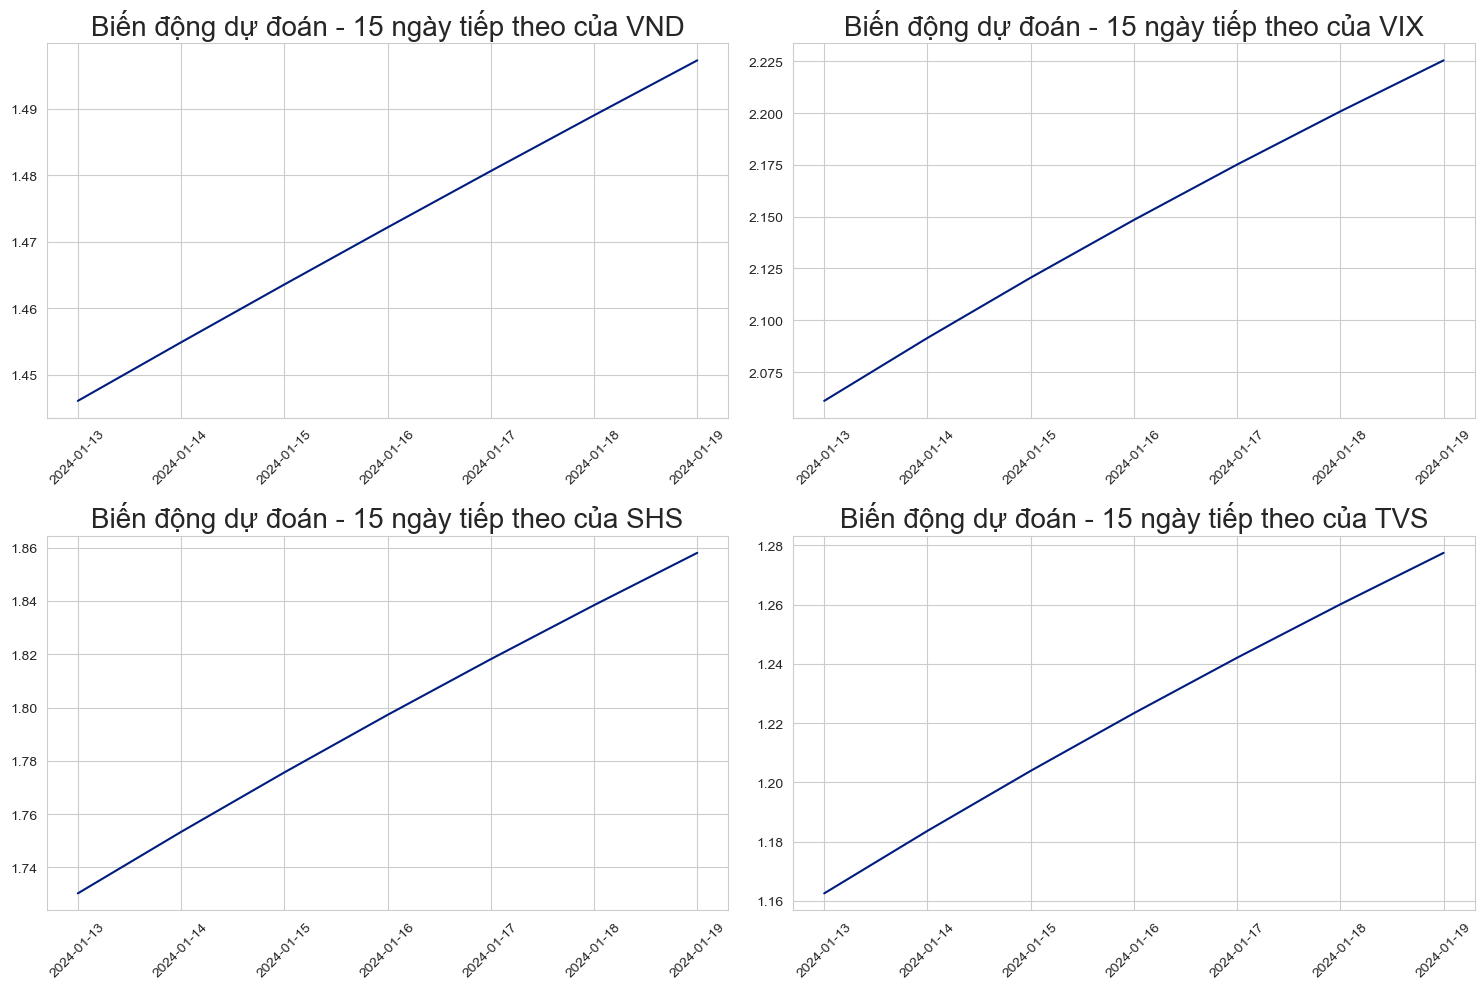

In [55]:
from pmdarima import auto_arima
from math import *
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta 
from dateutil.relativedelta import relativedelta
from arch import arch_model
import vnstock as vn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

end = datetime.now()
start = datetime(end.year - 11, end.month, end.day)

start = start.strftime('%Y-%m-%d')
end = end.strftime('%Y-%m-%d')

last_stock_list = ["VND", "VIX", "SHS", "TVS"]
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, stock_code in enumerate(last_stock_list):
    data = vn.stock_historical_data(stock_code, start, end, resolution='1D',
                                    type='stock').set_index("time")
    data = data.loc[~data.index.duplicated(keep='first')]  

    # Set the frequency to daily and forward fill missing values
    data = data.asfreq('D', method='ffill')
    data['Close_Log'] = np.log(data['close'])

    returns =  100* data.close.pct_change().dropna()

    model = arch_model(returns, p=1, q=1)
    model_fit = model.fit(disp='off')

    pred = model_fit.forecast(horizon=7)
    future_dates = [returns.index[-1] + timedelta(days=j) for j in range(1,8)]
    pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

    ax = axs[i//2, i%2]
    ax.plot(pred)
    ax.set_title('Biến động dự đoán - 15 ngày tiếp theo của ' + stock_code, fontsize=20)
    ax.set_xticks(pred.index)
    ax.set_xticklabels([date.strftime('%Y-%m-%d') for date in pred.index], rotation=45)

plt.tight_layout()
#output_file_path = 'GARCH_ALL_FORC.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.show()
#plt.close()
